In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import MaxNLocator, FuncFormatter

## 1. 데이터 전처리

In [25]:
order_products_prior = pd.read_csv('order_products_prior.csv')
order_products_train = pd.read_csv('order_products_train.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')
aisles = pd.read_csv('aisles.csv')
products = pd.read_csv('products.csv')
category = pd.read_csv('category.csv')

In [27]:
order_products_all = pd.concat([order_products_prior, order_products_train], ignore_index=True)  # ignore_index=True 옵션을 사용하여 인덱스를 새롭게 설정 
order_products_all.to_csv("order_products_all.csv", index=False)  # index=False 옵션을 추가하여 불필요한 인덱스 번호 제외

In [29]:
order_products_all = pd.read_csv('order_products_all.csv')

In [31]:
print(order_products_all)

          order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
...            ...         ...                ...        ...
33819101   3421063       14233                  3          1
33819102   3421063       35548                  4          1
33819103   3421070       35951                  1          1
33819104   3421070       16953                  2          1
33819105   3421070        4724                  3          1

[33819106 rows x 4 columns]


In [33]:
order_products_all = order_products_all.merge(products, on="product_id", how="left")
print(order_products_all.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id  
0        86             16  
1        83              4  
2       104             13  
3        19             13  
4        17             13  


In [35]:
print(order_products_all['aisle_id'].isnull().sum())
print(order_products_all['department_id'].isnull().sum())

0
0


In [37]:
print(orders['days_since_prior_order'].isnull().sum())

206209


In [39]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)
print(orders['days_since_prior_order'].isnull().sum())

0


In [41]:
dow_mapping = {
    0: "sat", 1: "sun", 2: "mon", 3: "tue",
    4: "wed", 5: "thu", 6: "fri"
    
}
orders["order_day"] = orders["order_dow"].map(dow_mapping)
print(orders[["order_dow", "order_day"]].head())

   order_dow order_day
0          2       mon
1          3       tue
2          3       tue
3          4       wed
4          4       wed


In [43]:
print(orders.head())
orders.to_csv("orders_w_day.csv", index=False)

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order order_day  
0                     0.0       mon  
1                    15.0       tue  
2                    21.0       tue  
3                    29.0       wed  
4                    28.0       wed  


In [44]:
orders_w_day = pd.read_csv('orders_w_day.csv')

In [47]:
order_products_all = order_products_all.merge(aisles, on="aisle_id", how="left")
order_products_all = order_products_all.merge(departments, on="department_id", how="left")

In [49]:
order_products_all.to_csv("order_products_aisle_dep.csv", index=False)

In [51]:
order_products_aisle_dep = pd.read_csv('order_products_aisle_dep.csv')
instacart_total = order_products_aisle_dep.merge(orders_w_day, on="order_id", how="left")
print(instacart_total.isnull().sum())

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
order_day                 0
dtype: int64


In [53]:
instacart_total['category'] = instacart_total['department'].map(category.set_index('department')['category'])
print(instacart_total.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  user_id eval_set  \
0        86             16                eggs  dairy eggs   202279    prior   
1        83              4    fresh vegetables     produce   202279    prior   
2       104             13   spices seasonings      pantry   202279    prior   
3        19             13       oils vinegars      pantry   202279    prior   
4        17             13  baking ingredients      pantry   202279    prior   

   order_number  order_dow  order_hour

In [71]:
instacart_total.to_csv("instacart_total.csv", index=False)

NameError: name 'instacart_total' is not defined

### 1-1. 데이터 불러오기

In [2]:
df = pd.read_csv('instacart_total.csv')
print(df)

          order_id  product_id  add_to_cart_order  reordered  \
0                2       33120                  1          1   
1                2       28985                  2          1   
2                2        9327                  3          0   
3                2       45918                  4          1   
4                2       30035                  5          0   
...            ...         ...                ...        ...   
33819101   3421063       14233                  3          1   
33819102   3421063       35548                  4          1   
33819103   3421070       35951                  1          1   
33819104   3421070       16953                  2          1   
33819105   3421070        4724                  3          1   

                             product_name  aisle_id  department_id  \
0                      Organic Egg Whites        86             16   
1                   Michigan Organic Kale        83              4   
2                    

## 2. 가설 1 - 재구매율이 높은 특정군이 있다.

### 2-1. 카테고리별 재구매율 계산

In [9]:
import pandas as pd

# 'reordered' 값이 1인 경우 재구매로 간주
df['reordered'] = df['reordered'].astype('int8')  # 메모리 절약을 위해 int8 사용

# category별 재구매율 계산
category_reorder_rate = df.groupby('category')['reordered'].mean()

# 결과 정렬
category_reorder_rate = category_reorder_rate.sort_values(ascending=False)

# 결과 출력
print(category_reorder_rate)


category
Fresh Foods           0.653600
Packaged Foods        0.554136
Others                0.520951
Household Products    0.435609
Miscellaneous         0.394323
Name: reordered, dtype: float64


C:\Users\lsy\AppData\Local\Temp\ipykernel_23100\3295621996.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_reorder_rate.index, y=department_reorder_rate.values, palette=colors)


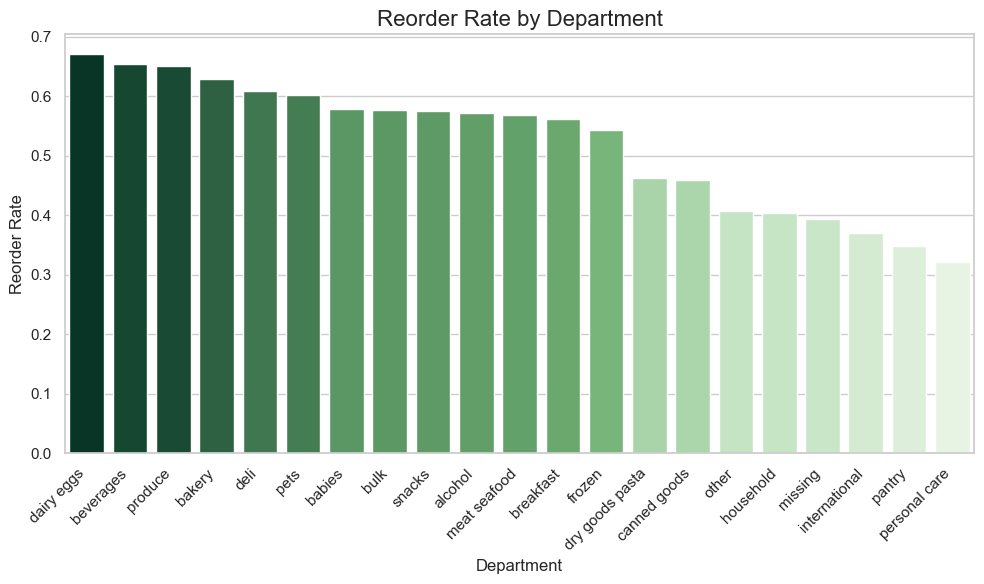

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# department별 재구매율 계산 (Pandas 기반)
department_reorder_rate = df.groupby('department')['reordered'].mean()

# 결과 정렬
department_reorder_rate = department_reorder_rate.sort_values(ascending=False)

# 사용자 정의 색상 그라데이션 (흰색을 연한 초록색으로 대체)
cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#E5F7E1", "#B2E4B2", "#66BB6A", "#003D29"], N=512
)

# Normalize 객체를 사용하여 값 범위 [0, 1]로 정규화
norm = Normalize(vmin=department_reorder_rate.min(), vmax=department_reorder_rate.max())

# ScalarMappable을 사용하여 색상 매핑
sm = ScalarMappable(cmap=cmap, norm=norm)

# 색상 매핑: 각 값에 대해 색상 계산
colors = [sm.to_rgba(val) for val in department_reorder_rate]

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 바차트 시각화
plt.figure(figsize=(10, 6))

# 바차트 그리기
sns.barplot(x=department_reorder_rate.index, y=department_reorder_rate.values, palette=colors)

# 그래프 제목, 레이블 설정
plt.title("Reorder Rate by Department", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Reorder Rate", fontsize=12)

# 그래프 표시
plt.xticks(rotation=45, ha='right')  # 부서 이름이 겹치지 않도록 회전
plt.tight_layout()

# 그래프 출력
plt.show()


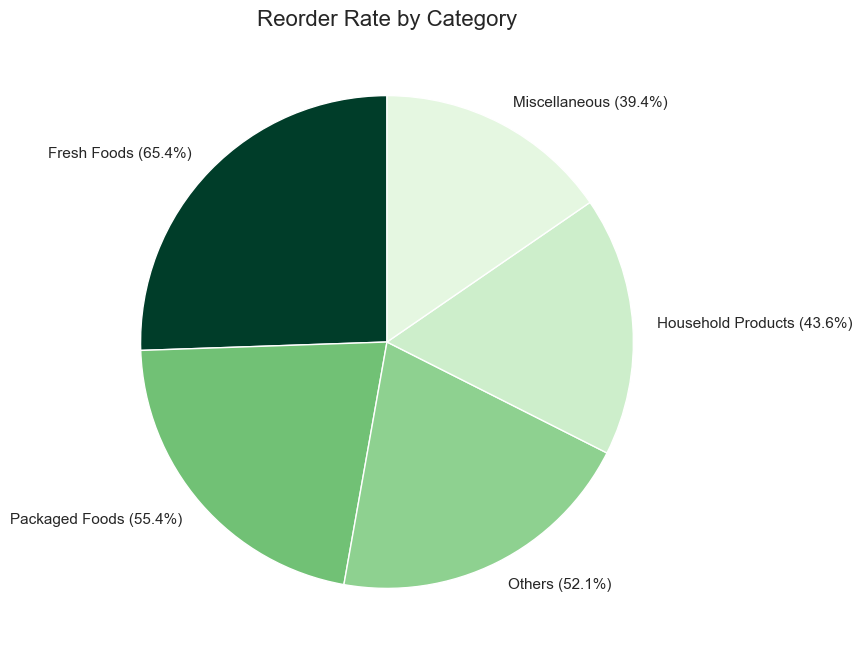

In [15]:
# 사용자 정의 색상 그라데이션 (흰색을 연한 초록색으로 대체)
cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#E5F7E1", "#B2E4B2", "#66BB6A", "#003D29"], N=512
)

# Normalize 객체를 사용하여 값 범위 [0, 1]로 정규화
norm = Normalize(vmin=min(category_reorder_rate), vmax=max(category_reorder_rate))

# ScalarMappable을 사용하여 색상 매핑
sm = ScalarMappable(cmap=cmap, norm=norm)

# 색상 매핑: 각 값에 대해 색상 계산
colors = [sm.to_rgba(val) for val in category_reorder_rate]

# 비율을 표시할 라벨 생성 (카테고리 이름 + 비율)
labels = [f"{category} ({val*100:.1f}%)" for category, val in zip(category_reorder_rate.index, category_reorder_rate)]

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(category_reorder_rate, labels=labels, startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})

# 그래프 제목 설정
plt.title("Reorder Rate by Category", fontsize=16)

# 저장 및 그래프 표시
plt.savefig('10-Reorder_Rate_by_Category.png', transparent=True, bbox_inches='tight')
plt.show()

### 2. 가설 2 - 장바구니에 담긴 제품이 많을수록 재구매율이 높을 것이다.

### 2-1. 장바구니 크기와 주문 수

In [16]:
# order_id 기준으로 상품 개수 계산
order_sizes = df.groupby('order_id').size()

# 결과 확인 (상위 10개)
order_sizes.head(10)

order_id
1      8
2      9
3      8
4     13
5     26
6      3
7      2
8      1
9     15
10    15
dtype: int64

In [5]:
import pandas as pd

# Instacart 데이터 로드
df = pd.read_csv('instacart_total.csv')  # 사용자 데이터 파일명에 맞게 변경

# 장바구니 크기 범위 설정 (Bins)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
labels = ['[0, 10)', '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', 
          '[70, 80)', '[80, 90)', '[90, 100)', '[100, 110)', '[110, 120)', '[120, 130)', 
          '[130, 140)', '[140, 150)']

# order_id 기준으로 장바구니 크기(cart_size) 계산
cart_size_df = df.groupby('order_id').size().reset_index(name='cart_size')

# order_id 기준으로 중복 제거 후 cart_size_df와 병합
order_products_with_department = df[['order_id', 'product_id', 'department_id']].drop_duplicates(subset='order_id')

# cart_size_df 병합 (장바구니 크기 추가)
order_products_with_department = order_products_with_department.merge(cart_size_df, on='order_id', how='left')

# Pandas cut()을 사용해 장바구니 크기를 범위별로 구분
order_products_with_department['cart_size_bin'] = pd.cut(
    order_products_with_department['cart_size'], bins=bins, labels=labels, right=False
)

# 전체 구간을 기준으로 카운트 (각 범위별 주문 개수 계산)
cart_size_distribution = order_products_with_department['cart_size_bin'].value_counts().reindex(labels, fill_value=0)

# Pandas cut()을 사용하여 범위별 주문 개수 재확인 (추가된 코드)
order_bins = pd.cut(cart_size_df['cart_size'], bins=bins, labels=labels, right=False)
bin_counts = order_bins.value_counts(sort=False)  # 정렬 유지

# 결과 확인
print("🔹 주문 개수 분포:")
print(cart_size_distribution)
print("\n🔹 Pandas cut()을 사용한 주문 개수 분포:")
print(bin_counts)


🔹 주문 개수 분포:
cart_size_bin
[0, 10)       1908389
[10, 20)      1069647
[20, 30)       287215
[30, 40)        64029
[40, 50)        13038
[50, 60)         2786
[60, 70)          664
[70, 80)          195
[80, 90)           64
[90, 100)          32
[100, 110)         16
[110, 120)          4
[120, 130)          2
[130, 140)          1
[140, 150)          1
Name: count, dtype: int64

🔹 Pandas cut()을 사용한 주문 개수 분포:
cart_size
[0, 10)       1908389
[10, 20)      1069647
[20, 30)       287215
[30, 40)        64029
[40, 50)        13038
[50, 60)         2786
[60, 70)          664
[70, 80)          195
[80, 90)           64
[90, 100)          32
[100, 110)         16
[110, 120)          4
[120, 130)          2
[130, 140)          1
[140, 150)          1
Name: count, dtype: int64


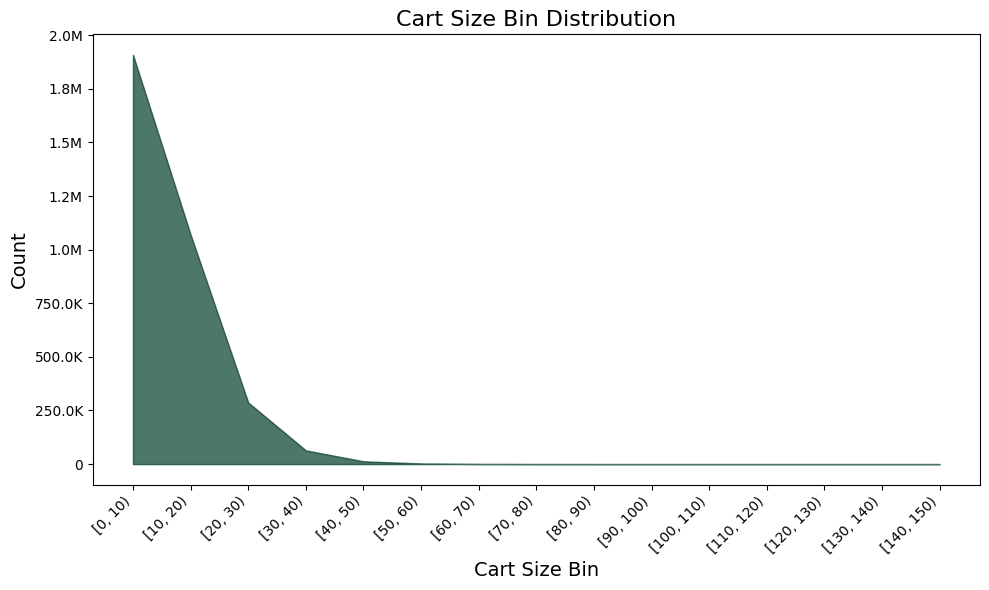

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))

# 색상 적용 (단일 색상 #003D29 사용)
plt.fill_between(bin_counts.index, bin_counts.values, color="#003D29", alpha=0.7)

# 그래프 제목과 라벨 추가
plt.title('Cart Size Bin Distribution', fontsize=16)
plt.xlabel('Cart Size Bin', fontsize=14)
plt.ylabel('Count', fontsize=14)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# y축 K(천 단위), M(백만 단위)로 변환
def human_format(num, pos):
    if num >= 1_000_000:
        return f'{num/1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num/1_000:.1f}K'
    else:
        return str(int(num))

plt.gca().yaxis.set_major_formatter(FuncFormatter(human_format))

# 그래프 출력
plt.tight_layout()

# 바탕 없는 이미지로 저장
plt.savefig('Cart_Size_Bin_Distribution.png', transparent=True)

# 그래프 표시
plt.show()


### 2-1. 재구매율 계산

In [11]:

# 1️ 데이터 로드 (Dask 대신 Pandas 사용)
order_products_prior = pd.read_csv('order_products__prior.csv')

# 2️ order_products_all 생성: 필요한 컬럼만 선택
order_products_all = order_products_prior[['order_id', 'product_id', 'reordered']]

# 3️ 각 주문별 장바구니에 담긴 제품 수 계산
cart_sizes = order_products_all.groupby('order_id')['product_id'].count().reset_index()
cart_sizes.columns = ['order_id', 'cart_size']  # 주문당 제품 수 (장바구니 크기)

# 4️ 주문별 재구매율 계산
order_reorder_rate = order_products_all.groupby('order_id')['reordered'].mean().reset_index()
order_reorder_rate.columns = ['order_id', 'reorder_rate']  # 각 주문의 재구매율

# 5️ 장바구니 크기와 재구매율 병합
user_data = pd.merge(cart_sizes, order_reorder_rate, on='order_id', how='left')

# 6️ 장바구니 크기를 10단위로 나누기
user_data['cart_size_bin'] = pd.cut(
    user_data['cart_size'], 
    bins=range(0, user_data['cart_size'].max() + 10, 10), 
    right=False
)

# 7️ 구간별 재구매율 계산 (observed=True 옵션 제거, Pandas에서 필요 없음)
reorder_rate_by_cart_size = user_data.groupby('cart_size_bin')['reorder_rate'].mean().reset_index()

# 결과 확인
reorder_rate_by_cart_size


C:\Users\lsy\AppData\Local\Temp\ipykernel_16604\3221897590.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorder_rate_by_cart_size = user_data.groupby('cart_size_bin')['reorder_rate'].mean().reset_index()


cart_size_bin  reorder_rate
0        [0, 10)      0.610116
1       [10, 20)      0.578987
2       [20, 30)      0.592561
3       [30, 40)      0.608870
4       [40, 50)      0.613474
5       [50, 60)      0.607519
6       [60, 70)      0.622247
7       [70, 80)      0.583972
8       [80, 90)      0.609655
9      [90, 100)      0.638729
10    [100, 110)      0.641267
11    [110, 120)      0.787053
12    [120, 130)      0.366988
13    [130, 140)      0.948905
14    [140, 150)      0.551724

In [12]:
# 장바구니 크기와 재구매율을 구간별로 집계
user_data = pd.merge(cart_sizes, order_reorder_rate, on='order_id', how='left')

# 장바구니 크기를 10단위로 나누기
user_data['cart_size_bin'] = pd.cut(user_data['cart_size'], bins=range(0, user_data['cart_size'].max() + 10, 10), right=False)

# 구간별 재구매율 계산
reorder_rate_by_cart_size = user_data.groupby('cart_size_bin')['reorder_rate'].mean().reset_index()

# 피벗 테이블 생성: 'cart_size_bin'을 행으로, 'reorder_rate'를 열로 설정
reorder_rate_pivot = reorder_rate_by_cart_size.set_index('cart_size_bin')

reorder_rate_pivot

C:\Users\lsy\AppData\Local\Temp\ipykernel_16604\1679998482.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reorder_rate_by_cart_size = user_data.groupby('cart_size_bin')['reorder_rate'].mean().reset_index()


reorder_rate
cart_size_bin              
[0, 10)            0.610116
[10, 20)           0.578987
[20, 30)           0.592561
[30, 40)           0.608870
[40, 50)           0.613474
[50, 60)           0.607519
[60, 70)           0.622247
[70, 80)           0.583972
[80, 90)           0.609655
[90, 100)          0.638729
[100, 110)         0.641267
[110, 120)         0.787053
[120, 130)         0.366988
[130, 140)         0.948905
[140, 150)         0.551724

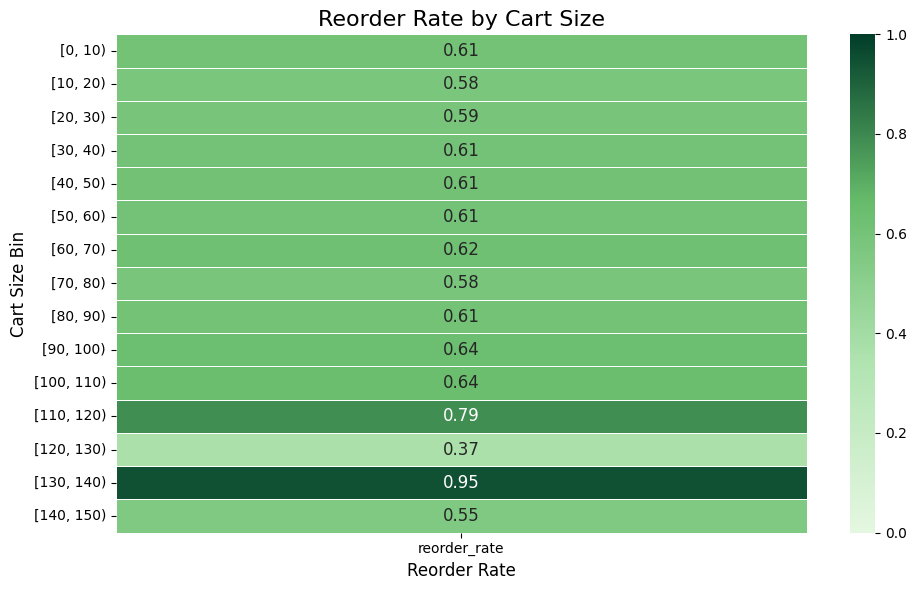

In [13]:
from matplotlib.colors import LinearSegmentedColormap

# 사용자 정의 색상 그라데이션: #003D29을 시작 색상으로 사용
cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#E5F7E1", "#B2E4B2", "#66BB6A", "#003D29"], N=512
)

# 히트맵 시각화 (색상 차이를 선명하게 하기 위해 vmin과 vmax 설정)
plt.figure(figsize=(10, 6))
sns.heatmap(reorder_rate_pivot, annot=True, fmt='.2f', cmap=cmap, cbar=True, linewidths=0.5, annot_kws={"size": 12}, vmin=0, vmax=1)

# 제목과 축 레이블
plt.title('Reorder Rate by Cart Size', fontsize=16)
plt.xlabel('Reorder Rate', fontsize=12)
plt.ylabel('Cart Size Bin', fontsize=12)
plt.tight_layout()

# 이미지 파일로 저장
plt.savefig('16-Reorder_Rate_by_Cart_Size.png', transparent=True)

# 그래프 출력
plt.show()

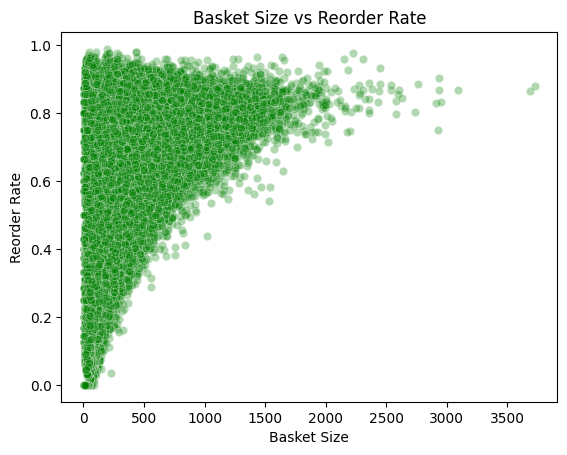

상관계수:  0.5624316281789666


In [14]:
# 고객별 장바구니 크기 및 재구매율 계산
basket = df.groupby('user_id').agg({
    'product_id':'count',
    'reordered':'mean'
}).rename(columns={'product_id':'basket_size', 'reordered':'reorder_rate'})

# 산점도 및 상관계수
sns.scatterplot(data=basket, x='basket_size', y='reorder_rate', alpha=0.3, color='green')
plt.title('Basket Size vs Reorder Rate')
plt.xlabel('Basket Size')
plt.ylabel('Reorder Rate')
plt.show()

print("상관계수: ", basket.corr().iloc[0,1])

### 2-2. 이상치 확인 및 처리에 대한 고민

### IQR를 활용하여 이상치 탐지

In [15]:
# 이상치를 탐지할 열 정의
cols = ['basket_size', 'reorder_rate']

# IQR을 활용한 이상치 탐지 함수 정의
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# basket_size 이상치
outliers_basket_size = find_outliers(basket, 'basket_size')

# reorder_rate 이상치
outliers_reorder_rate = find_outliers(basket, 'reorder_rate')

print("장바구니 크기 이상치 수:", len(outliers_basket_size))
print("재구매율 이상치 수:", len(outliers_reorder_rate))


장바구니 크기 이상치 수: 18341
재구매율 이상치 수: 0


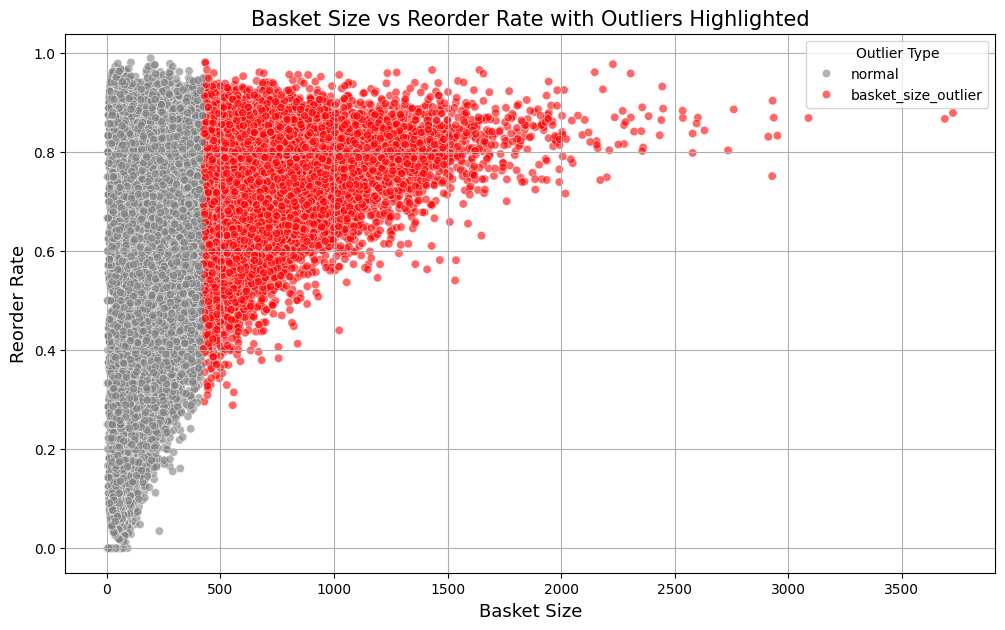

In [16]:
# 이상치를 하나의 데이터프레임으로 통합
basket['outlier'] = 'normal'
basket.loc[outliers_basket_size.index, 'outlier'] = 'basket_size_outlier'
basket.loc[outliers_reorder_rate.index, 'outlier'] = 'reorder_rate_outlier'

plt.figure(figsize=(12,7))

sns.scatterplot(
    data=basket, 
    x='basket_size', 
    y='reorder_rate', 
    hue='outlier',
    palette={'normal':'gray', 'basket_size_outlier':'red', 'reorder_rate_outlier':'blue'},
    alpha=0.6
)

plt.title('Basket Size vs Reorder Rate with Outliers Highlighted', fontsize=15)
plt.xlabel('Basket Size', fontsize=13)
plt.ylabel('Reorder Rate', fontsize=13)
plt.legend(title='Outlier Type')
plt.grid(True)
plt.show()

### Z-Score을 통한 이상치 탐지

In [18]:
import numpy as np
from scipy.stats import zscore
# Z-score를 통한 이상치 탐지 (평균 대비 표준편차로 측정)
from scipy.stats import zscore

basket['z_score'] = zscore(basket['basket_size'])
extreme_outliers = basket[np.abs(basket['z_score']) > 3]  # Z-score가 3 이상이면 이상치

# Z-score 계산
basket['z_score'] = zscore(basket['basket_size'])

# Z-score 3 이상 또는 -3 이하를 이상치로 정의
basket['z_outlier'] = np.where(np.abs(basket['z_score']) > 3, 'outlier', 'normal')

# 이상치 수 확인
print("이상치 수:", basket['z_outlier'].value_counts())

이상치 수: z_outlier
normal     201335
outlier      4874
Name: count, dtype: int64


In [19]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=basket, 
    x='basket_size', 
    y='reorder_rate', 
    hue='z_outlier',
    palette={'normal':'gray', 'outlier':'red'},
    alpha=0.6
)

plt.title('Basket Size vs Reorder Rate (Z-score Outliers)', fontsize=15)
plt.xlabel('Basket Size', fontsize=13)
plt.ylabel('Reorder Rate', fontsize=13)
plt.legend(title='Outlier (Z-score)')
plt.grid(True)
plt.show()

### 백분위수를 통한 이상치 탐지

In [21]:
# 백분위수 기준 이상치 탐지
import numpy as np

# 99번째 백분위수를 기준으로 설정 (상위 1%만 이상치로 간주)
threshold = basket['basket_size'].quantile(0.99)

# 이상치 여부를 컬럼으로 추가
basket['percentile_outlier'] = np.where(basket['basket_size'] > threshold, 'outlier', 'normal')

# 탐지된 이상치 수 확인
print("99% 백분위수 값:", threshold)
print(basket['percentile_outlier'].value_counts())

99% 백분위수 값: 1016.9199999999837
percentile_outlier
normal     204146
outlier      2063
Name: count, dtype: int64


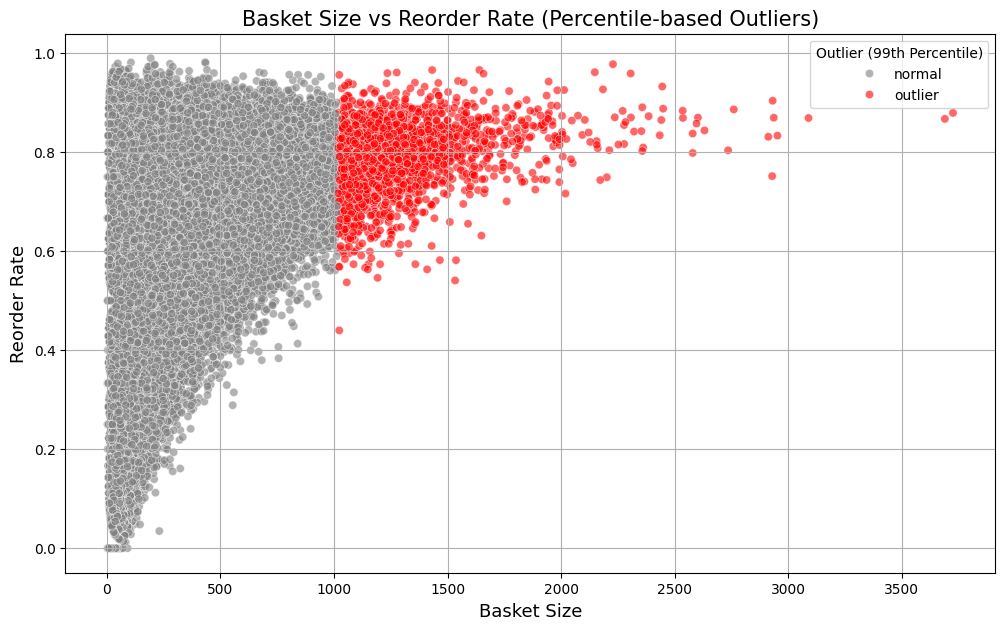

In [22]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=basket,
    x='basket_size',
    y='reorder_rate',
    hue='percentile_outlier',
    palette={'normal':'gray', 'outlier':'red'},
    alpha=0.6
)

plt.title('Basket Size vs Reorder Rate (Percentile-based Outliers)', fontsize=15)
plt.xlabel('Basket Size', fontsize=13)
plt.ylabel('Reorder Rate', fontsize=13)
plt.legend(title='Outlier (99th Percentile)')
plt.grid(True)
plt.show()

### 결론 : 이상치 제거할 필요 없음을 확인 -> 파레토법칙에 의하여

In [23]:
# 이상치 고객군의 재구매율 평균
outlier_reorder_rate = basket[basket['percentile_outlier']=='outlier']['reorder_rate'].mean()

# 일반 고객군의 재구매율 평균
normal_reorder_rate = basket[basket['percentile_outlier']=='normal']['reorder_rate'].mean()

print(f"이상치 고객군 평균 재구매율: {outlier_reorder_rate:.4f}")
print(f"일반 고객군 평균 재구매율: {normal_reorder_rate:.4f}")

이상치 고객군 평균 재구매율: 0.7894
일반 고객군 평균 재구매율: 0.4408


### 3. 연관규칙

#### 향상도는 제품 간 진정한 의미의 연관성을 파악하고 싶을 때 가장 중요하게 고려하기 위함으로 lift를 고정으로 둠.
#### 최소 지지도 5%는 비즈니스에서 실질적 활용성을 위한 최소 출현 빈도를 확보하기 위함. 
#### 최소 신뢰도 30%는 신뢰할 수 있는 규칙을 선별하기 위한 합리적인 기준으로, 연관규칙의 활용성을 높이기 위한 선택.

In [26]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# aisle 기준 트랜잭션
transactions_aisle = df.groupby('order_id')['aisle'].apply(lambda x: list(set(x))).tolist()

te_aisle = TransactionEncoder()
te_result_aisle = te_aisle.fit(transactions_aisle).transform(transactions_aisle)
df_te_aisle = pd.DataFrame(te_result_aisle, columns=te_aisle.columns_)

# 자주 등장하는 aisle 조합 추출 (최소 지지도 0.05 이상)
frequent_aisles = apriori(df_te_aisle, min_support=0.05, use_colnames=True, max_len=2)

# aisle 연관 규칙 분석
aisle_rules = association_rules(frequent_aisles, metric='lift', min_threshold=1.0)
aisle_rules = aisle_rules.sort_values(['lift', 'confidence'], ascending=False)

# 상위 10개 aisle 규칙
top_aisle_rules = aisle_rules.head(10)
print(top_aisle_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                     antecedents                   consequents   support  \
86            (fresh vegetables)                 (fresh herbs)  0.079047   
87                 (fresh herbs)            (fresh vegetables)  0.079047   
12    (canned jarred vegetables)            (fresh vegetables)  0.056155   
13            (fresh vegetables)    (canned jarred vegetables)  0.056155   
14            (fresh vegetables)          (canned meals beans)  0.050033   
15          (canned meals beans)            (fresh vegetables)  0.050033   
7                        (bread)             (packaged cheese)  0.059441   
6              (packaged cheese)                       (bread)  0.059441   
88  (packaged vegetables fruits)                 (fresh herbs)  0.052647   
89                 (fresh herbs)  (packaged vegetables fruits)  0.052647   

    confidence      lift  
86    0.177896  1.901328  
87    0.844839  1.901328  
12    0.761785  1.714413  
13    0.126377  1.714413  
14    0.112601  1.613222  
1

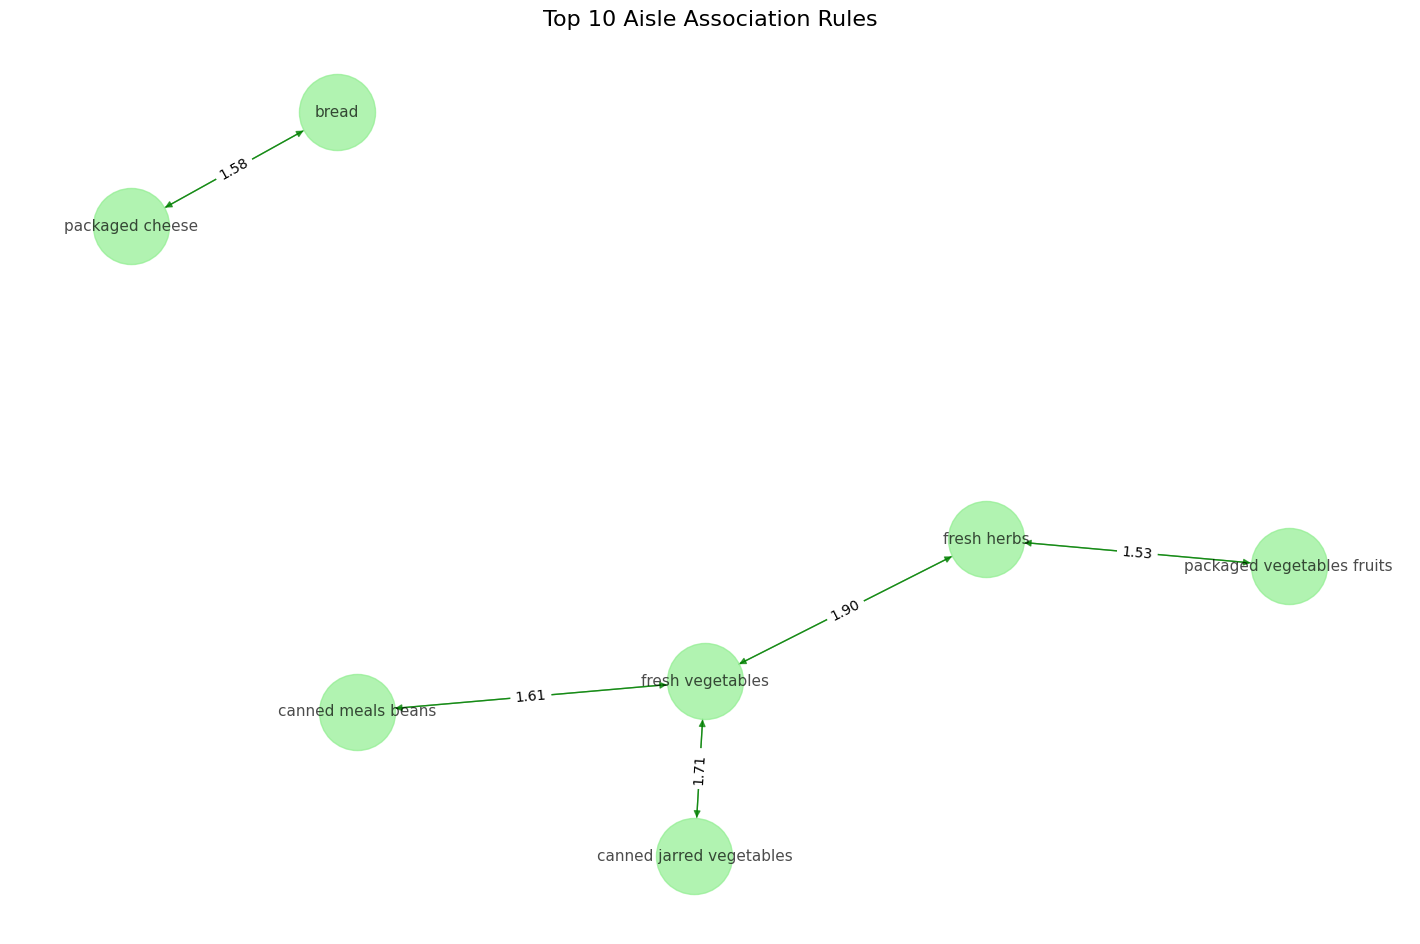

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# 시각화 함수
def draw_aisle_network(rules, title):
    G = nx.DiGraph()

    # 규칙(antecedents→consequents)을 그래프의 엣지로 추가
    for _, row in rules.iterrows():
        antecedent = ', '.join(row['antecedents'])
        consequent = ', '.join(row['consequents'])
        G.add_edge(antecedent, consequent, weight=row['lift'])

    plt.figure(figsize=(14, 9))
    pos = nx.spring_layout(G, k=1)

    # 노드 그리기
    nx.draw(G, pos, edge_color='green', node_color='lightgreen',
            with_labels=True, node_size=3000, font_size=11, alpha=0.7)

    # 향상도(lift) 표시
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})

    plt.title(title, fontsize=16)
    plt.show()

# top_aisle_rules 시각화 호출
draw_aisle_network(top_aisle_rules, 'Top 10 Aisle Association Rules')

In [29]:
# aisle 기준 트랜잭션 생성
transactions_aisle = df.groupby('order_id')['aisle'].apply(lambda x: list(set(x))).tolist()

te_aisle = TransactionEncoder()
te_result_aisle = te_aisle.fit(transactions_aisle).transform(transactions_aisle)
df_te_aisle = pd.DataFrame(te_result_aisle, columns=te_aisle.columns_)

# 최소 지지도 0.05(5%) 이상인 빈번한 aisle 조합 추출
frequent_aisles = apriori(df_te_aisle, min_support=0.05, use_colnames=True, max_len=2)

# aisle 연관 규칙 분석 (최소 향상도(lift)=1.0 이상)
aisle_rules = association_rules(frequent_aisles, metric='lift', min_threshold=1.0)

# lift 기준으로 내림차순 정렬 후 support≥0.05, confidence≥0.3 기준 추가 적용
filtered_rules = aisle_rules[
    (aisle_rules['support'] >= 0.05) & 
    (aisle_rules['confidence'] >= 0.3)
].sort_values(['lift', 'confidence', 'support'], ascending=False)

# 상위 10개 규칙 출력 (소수점 2자리까지 반올림)
top_filtered_rules = filtered_rules.head(10).copy()
top_filtered_rules[['support', 'confidence', 'lift']] = top_filtered_rules[['support', 'confidence', 'lift']].round(2)

print(top_filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                    antecedents                   consequents  support  \
87                (fresh herbs)            (fresh vegetables)     0.08   
12   (canned jarred vegetables)            (fresh vegetables)     0.06   
15         (canned meals beans)            (fresh vegetables)     0.05   
7                       (bread)             (packaged cheese)     0.06   
89                (fresh herbs)  (packaged vegetables fruits)     0.05   
107       (soup broth bouillon)            (fresh vegetables)     0.06   
5                       (bread)                        (milk)     0.06   
49       (fresh dips tapenades)  (packaged vegetables fruits)     0.05   
113            (frozen produce)  (packaged vegetables fruits)     0.07   
120                      (milk)                      (yogurt)     0.10   

     confidence  lift  
87         0.84  1.90  
12         0.76  1.71  
15         0.72  1.61  
7          0.36  1.58  
89         0.56  1.53  
107        0.67  1.50  
5          0.36  

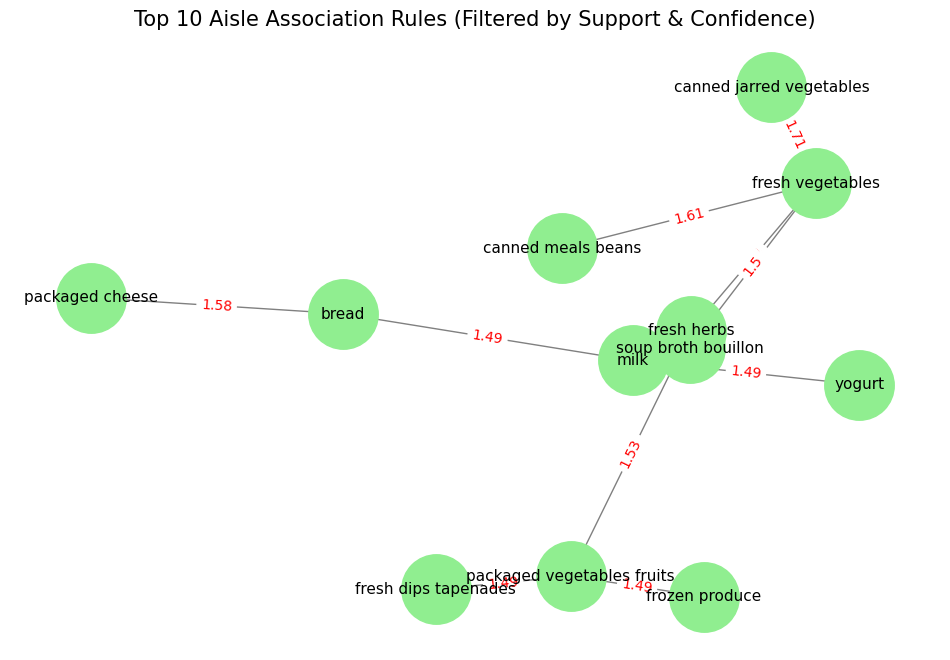

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_network(rules, title):
    plt.figure(figsize=(12,8))
    G = nx.DiGraph()

    # 규칙을 networkx 노드와 엣지로 추가
    for _, rule in rules.iterrows():
        antecedents = ', '.join(rule['antecedents'])
        consequents = ', '.join(rule['consequents'])
        G.add_edge(antecedents, consequents, weight=round(rule['lift'], 2))

    pos = nx.spring_layout(G, k=0.7)  # 보기 좋은 레이아웃 설정

    # 노드와 엣지 그리기
    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=2500)
    nx.draw_networkx_labels(G, pos, font_size=11)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray')

    # 엣지에 lift 값 표시
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# 앞서 만든 top_filtered_rules로 시각화
draw_network(top_filtered_rules, 'Top 10 Aisle Association Rules (Filtered by Support & Confidence)')


In [35]:
# departnents 기준 연관 규칙
# 연관규칙 분석
# department 단위의 transaction 데이터 생성
transactions_dept = df.groupby('order_id')['department'].apply(lambda x: list(set(x))).tolist()

# Transaction Encoder 적용
te_dept = TransactionEncoder()
te_result_dept = te_dept.fit(transactions_dept).transform(transactions_dept)
df_te_dept = pd.DataFrame(te_result_dept, columns=te_dept.columns_)

# 자주 등장하는 department 조합 추출 (최소 지지도 0.05 이상)
frequent_depts = apriori(df_te_dept, min_support=0.05, use_colnames=True, max_len=2)

# 연관 규칙 생성 (lift가 1.0 이상인 규칙 추출)
dept_rules = association_rules(frequent_depts, metric='lift', min_threshold=1.0)

# 상위 10개 연관규칙 (lift 기준 정렬)
top_dept_rules = dept_rules.sort_values(['lift', 'confidence'], ascending=False).head(10)
print(top_dept_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

           antecedents        consequents   support  confidence      lift
61   (dry goods pasta)     (canned goods)  0.072949    0.391341  1.842436
60      (canned goods)  (dry goods pasta)  0.072949    0.343446  1.842436
107     (meat seafood)  (dry goods pasta)  0.054740    0.305774  1.640346
106  (dry goods pasta)     (meat seafood)  0.054740    0.293655  1.640346
65      (meat seafood)     (canned goods)  0.060004    0.335181  1.578035
64      (canned goods)     (meat seafood)  0.060004    0.282500  1.578035
9               (deli)           (bakery)  0.097981    0.408496  1.488988
8             (bakery)             (deli)  0.097981    0.357144  1.488988
11   (dry goods pasta)           (bakery)  0.076017    0.407799  1.486449
10            (bakery)  (dry goods pasta)  0.076017    0.277087  1.486449


In [36]:
def draw_network(rules, title):
    G = nx.DiGraph()

    # 연관 규칙에서 antecedents와 consequents 추가
    for _, row in rules.iterrows():
        for ant in row['antecedents']:
            for cons in row['consequents']:
                G.add_edge(ant, cons, weight=row['lift'])

    # 그래프 시각화
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1)

    nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue', font_size=10, font_weight='bold')
    
    # 향상도(lift) 값 표시
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(title, fontsize=15)
    plt.show()

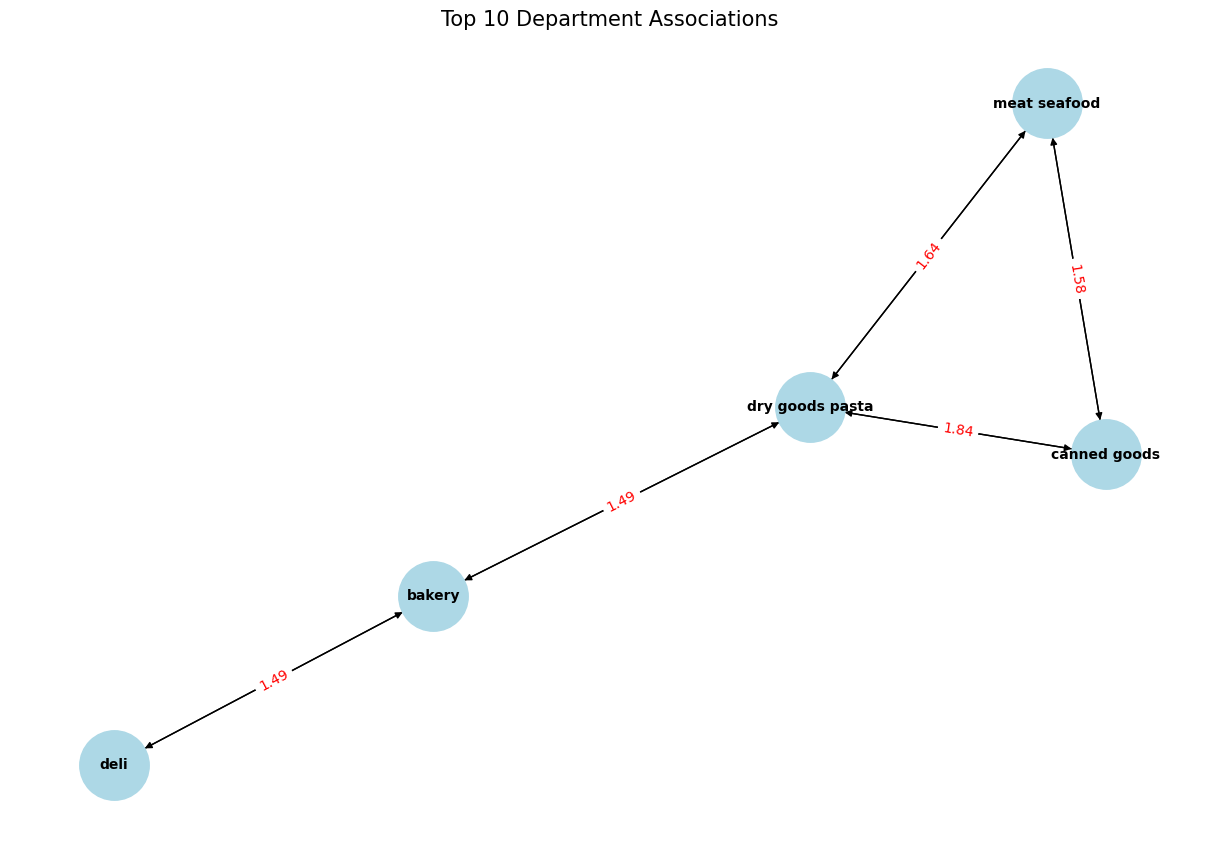

In [37]:
draw_network(top_dept_rules, 'Top 10 Department Associations')

                              antecedents  \
1755           (canned goods, dairy eggs)   
1754           (produce, dry goods pasta)   
2342            (produce, snacks, bakery)   
2802            (snacks, dry goods pasta)   
1748  (produce, canned goods, dairy eggs)   
1761                    (dry goods pasta)   
2351                     (snacks, bakery)   
2334          (produce, deli, dairy eggs)   
1757        (dairy eggs, dry goods pasta)   
1752              (produce, canned goods)   

                              consequents  support  confidence  lift  
1755           (produce, dry goods pasta)     0.06        0.34  2.12  
1754           (canned goods, dairy eggs)     0.06        0.36  2.12  
2342                   (deli, dairy eggs)     0.05        0.41  2.12  
2802        (produce, dairy eggs, frozen)     0.05        0.50  2.07  
1748                    (dry goods pasta)     0.06        0.38  2.04  
1761  (produce, canned goods, dairy eggs)     0.06        0.31  2.04  
2351   

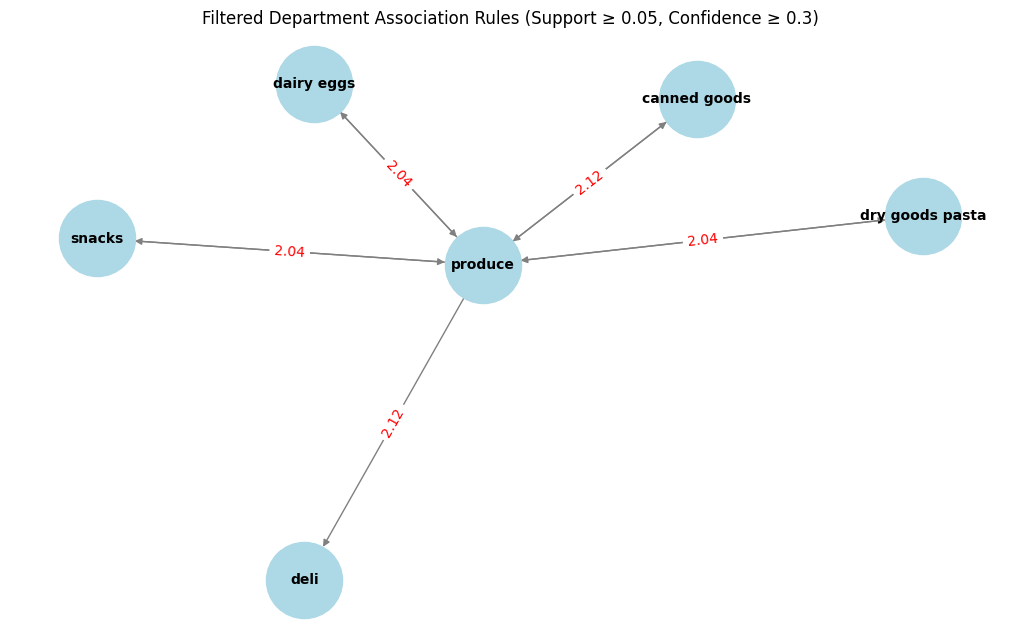

In [38]:
# 필터링 
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# 1 department 단위의 transaction 데이터 생성
transactions_dept = df.groupby('order_id')['department'].apply(lambda x: list(set(x))).tolist()

# 2 Transaction Encoder 적용
te_dept = TransactionEncoder()
te_result_dept = te_dept.fit(transactions_dept).transform(transactions_dept)
df_te_dept = pd.DataFrame(te_result_dept, columns=te_dept.columns_)

# 3 자주 등장하는 department 조합 추출 (최소 지지도 설정 가능)
min_support = 0.05  # 최소 지지도 설정 (필요시 변경 가능)
frequent_depts = apriori(df_te_dept, min_support=min_support, use_colnames=True)

# 4 연관 규칙 생성 및 필터링 (support, confidence, lift)
dept_rules = association_rules(frequent_depts, metric='lift', min_threshold=1.0)

# 필터링 기준 설정
min_confidence = 0.3  # 신뢰도 최소값
min_lift = 1.0  # 최소 향상도 설정

# 필터링 적용
filtered_rules = dept_rules[
    (dept_rules['confidence'] >= min_confidence) & (dept_rules['lift'] >= min_lift)
]

# 5 상위 10개 연관규칙 (lift 기준 정렬 및 소수점 2자리 반올림)
top_dept_rules = filtered_rules.sort_values(['lift', 'confidence'], ascending=False).head(10).copy()
top_dept_rules[['support', 'confidence', 'lift']] = top_dept_rules[['support', 'confidence', 'lift']].round(2)

print(top_dept_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 6 네트워크 그래프 시각화
# 그래프 생성
G = nx.DiGraph()

# 노드 및 엣지 추가
for _, row in top_dept_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    lift = row['lift']
    
    G.add_node(antecedent, size=500)
    G.add_node(consequent, size=500)
    G.add_edge(antecedent, consequent, weight=lift)

# 그래프 레이아웃 및 시각화
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in edges}, font_color='red')

plt.title("Filtered Department Association Rules (Support ≥ 0.05, Confidence ≥ 0.3)")
plt.show()


### 4. RFM

### 4-1. R, F, M 기준 세우기

In [39]:
# Recency: 고객별 최근 주문 시점 (실제 일수 기준)
# 각 주문의 누적된 일수를 계산하여 최근 주문일을 구합니다.
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

# 고객별로 마지막 주문까지의 누적일수 계산
user_recency = df.groupby(['user_id', 'order_number'])['days_since_prior_order'].first().groupby(level=0).cumsum().reset_index()

# 각 고객의 가장 최근(마지막) 주문의 누적 일수 확인
recency_df = user_recency.groupby('user_id')['days_since_prior_order'].max().reset_index()
recency_df.rename(columns={'days_since_prior_order':'Recency'}, inplace=True)

# Frequency: 고객별 주문 횟수
frequency_df = df.groupby('user_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id':'Frequency'}, inplace=True)

# Monetary: 고객별 평균 장바구니 크기
monetary_df = df.groupby(['user_id', 'order_id']).size().groupby('user_id').mean().reset_index()
monetary_df.rename(columns={0:'Monetary'}, inplace=True)

# 다시 병합
# 다시 RFM 병합
frequency_df = df.groupby('user_id')['order_id'].nunique().reset_index().rename(columns={'order_id':'Frequency'})
monetary_df = df.groupby(['user_id','order_id']).size().groupby('user_id').mean().reset_index().rename(columns={0:'Monetary'})

rfm = recency_df.merge(frequency_df, on='user_id').merge(monetary_df, on='user_id')

rfm.head()


user_id  Recency  Frequency   Monetary
0        1    190.0         11   6.363636
1        2    228.0         15  15.066667
2        3    133.0         12   7.333333
3        4     55.0          5   3.600000
4        5     46.0          5   9.200000

### 4-2. RFM Score

In [40]:
# 점수화(R, F, M)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop')
rfm['R_score'] = rfm['R_score'].max() - rfm['R_score'] + 1

rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1

# 총점 계산
rfm['RFM_Score'] = rfm[['R_score','F_score','M_score']].sum(axis=1)

# 고객 세그먼트 정의
def customer_segment(df):
    if df['RFM_Score'] >= 13:
        return '우수 고객'
    elif df['RFM_Score'] >= 10:
        return '잠재 고객'
    elif df['RFM_Score'] >= 7:
        return '관심 필요 고객'
    else:
        return '이탈 위험 고객'

rfm['Segment'] = rfm.apply(customer_segment, axis=1)

rfm.head()

user_id  Recency  Frequency   Monetary  R_score  F_score  M_score  \
0        1    190.0         11   6.363636        2        3        2   
1        2    228.0         15  15.066667        2        4        5   
2        3    133.0         12   7.333333        3        3        2   
3        4     55.0          5   3.600000        5        1        1   
4        5     46.0          5   9.200000        5        1        3   

   RFM_Score   Segment  
0          7  관심 필요 고객  
1         11     잠재 고객  
2          8  관심 필요 고객  
3          7  관심 필요 고객  
4          9  관심 필요 고객

In [41]:
# 실제 RFM 값 재확인
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())

             Recency      Frequency       Monetary
count  206209.000000  206209.000000  206209.000000
mean      167.071272      16.226658       9.984527
std       102.131999      16.662238       5.840846
min         0.000000       3.000000       1.000000
25%        81.000000       6.000000       5.777778
50%       145.000000      10.000000       9.000000
75%       248.000000      20.000000      13.000000
max       365.000000     100.000000      60.500000


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 연한 초록(#B2E4B2) → 중간 초록(#66BB6A) → 다크그린(#003D29) 그라데이션 팔레트 생성
cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#B2E4B2", "#66BB6A", "#003D29"], N=512
)

# 세그먼트별 고객 수 계산
segment_counts = rfm['Segment'].value_counts()
total_customers = segment_counts.sum()  # 전체 고객 수

# 세그먼트 정렬
segment_order = ['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객']

# 데이터 개수에 따라 색상 매핑
colors = [cmap(i / (len(segment_order)-1)) for i in range(len(segment_order))]

# 그래프 그리기 (테두리 제거)
plt.figure(figsize=(8,5))
ax = sns.countplot(data=rfm, x='Segment', order=segment_order, palette=colors)

# 각 막대 위에 값과 비율 표시
for p in ax.patches:
    count = p.get_height()  # 고객 수
    percentage = count / total_customers * 100  # 비율(%)
    
    # 값과 비율 함께 표시
    ax.annotate(f'{count:,} ({percentage:.1f}%)',  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Y축 조정
ax.set_ylim(bottom=100)  # 최소값 설정하여 작은 막대도 보이게 함

# 제목 및 라벨
plt.title('Customer Segments Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)  # 로그 스케일임을 강조
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# 그래프 출력 (저장 후에 실행)
plt.show()


C:\Users\lsy\AppData\Local\Temp\ipykernel_16604\2225289191.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=rfm, x='Segment', order=segment_order, palette=colors)


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 초록색 그라데이션 팔레트 생성
cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#B2E4B2", "#66BB6A", "#003D29"], N=512
)

# 세그먼트별 고객 수 계산
segment_counts = rfm['Segment'].value_counts()
total_customers = segment_counts.sum()  # 전체 고객 수

# 세그먼트 정렬
segment_order = ['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객']

# 데이터 개수에 따라 색상 매핑
colors = [cmap(i / (len(segment_order)-1)) for i in range(len(segment_order))]

# 파이차트 출력
plt.figure(figsize=(8,8))
sizes = [segment_counts.get(seg, 0) / total_customers * 100 for seg in segment_order]  # 비율 계산
customer_counts = [segment_counts.get(seg, 0) for seg in segment_order]  # 고객 수 정수값

wedges, texts, autotexts = plt.pie(sizes, labels=None, colors=colors, startangle=140, autopct='%1.1f%%',
                                   wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14, 'fontweight':'bold'})

# 원 안의 비율(%) 글자 스타일 변경
for autotext in autotexts:
    autotext.set_color('white')  # 흰색으로 가독성 높이기
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# 화살표로 라벨 추가 (고객 수 포함)
for i, (wedge, seg, count) in enumerate(zip(wedges, segment_order, customer_counts)):
    angle = (wedge.theta2 + wedge.theta1) / 2  # 조각의 중앙 각도
    x = np.cos(np.deg2rad(angle)) * 1.5  # x 좌표 (바깥쪽 조정)
    y = np.sin(np.deg2rad(angle)) * 1.4  # y 좌표
    
    # 화살표 속성 설정
    arrowprops = dict(facecolor='black', arrowstyle='->', linewidth=2, relpos=(0, 0.5))  # 화살표 굵기 & 위치 조정
    
    # 라벨 추가 (고객 수 포함)
    plt.annotate(f"{seg} ({count:,})", xy=(np.cos(np.deg2rad(angle)), np.sin(np.deg2rad(angle))), 
                 xytext=(x, y), fontsize=12, fontweight='bold', color='black',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'),
                 ha='center', va='center', arrowprops=arrowprops)

# 제목 설정
plt.title("Customer Segments Proportion", fontsize=18, fontweight='bold')

# 그래프 출력
plt.show()


C:\Users\lsy\AppData\Local\Temp\ipykernel_16604\2555048681.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'],
C:\Users\lsy\AppData\Local\Temp\ipykernel_16604\2555048681.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'],


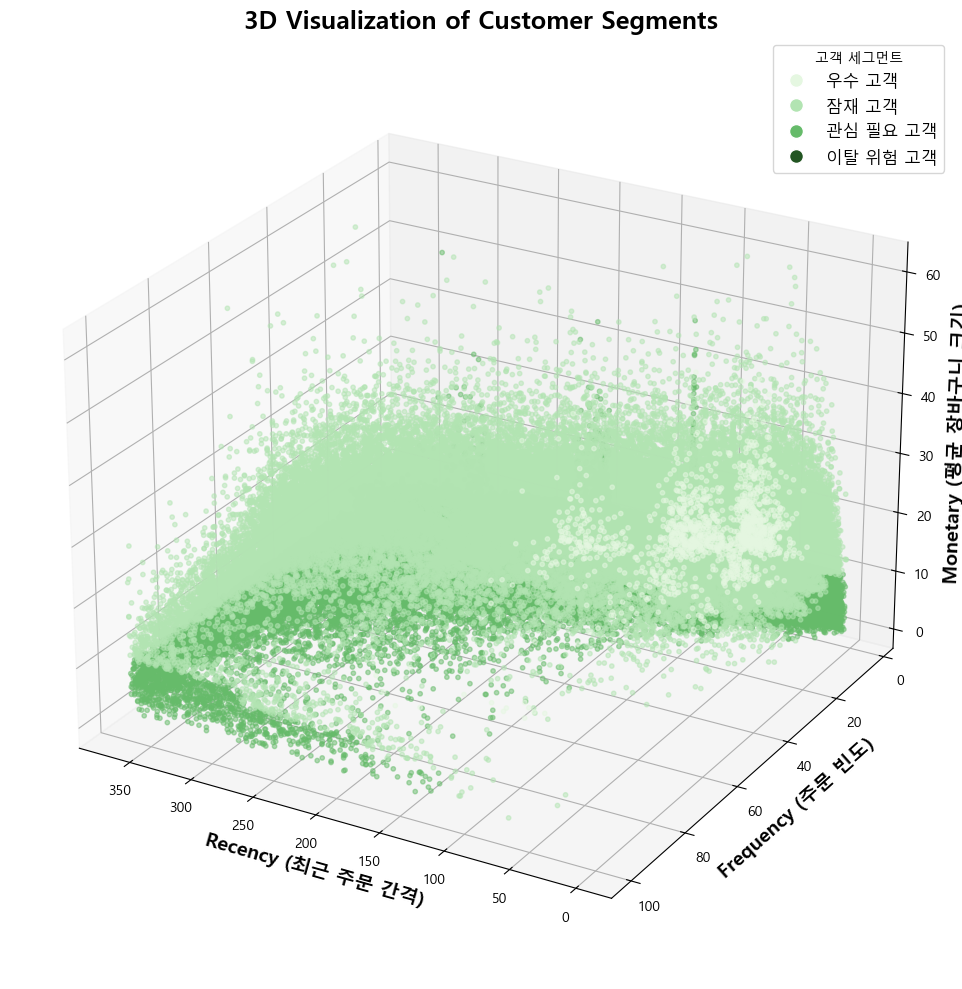

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

# 초록색 그라데이션 팔레트 생성
cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#E5F7E1", "#B2E4B2", "#66BB6A", "#225522"], N=512  # 다크 그린을 더 밝은 중간 톤으로 변경
)

# 고객 세그먼트별 색상 매핑
segments = ['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객']
segment_colors = {segment: cmap(i / (len(segments)-1)) for i, segment in enumerate(segments)}

# 3D 그래프 설정
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 고객 그룹별 산점도 (이탈 위험 고객 강조)
for segment, color in segment_colors.items():
    subset = rfm[rfm['Segment'] == segment]
    
    # 이탈 위험 고객만 점 크기 & 투명도 강조
    if segment == '이탈 위험 고객':
        ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'],
                   c=color, s=20, alpha=0.8, label=segment)  # 점 크기 증가 & 불투명도 증가
    else:
        ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'],
                   c=color, s=10, alpha=0.5)

# 축 라벨 및 제목 강조
ax.set_xlabel('Recency (최근 주문 간격)', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency (주문 빈도)', fontsize=14, fontweight='bold')
ax.set_zlabel('Monetary (평균 장바구니 크기)', fontsize=14, fontweight='bold')
ax.set_title('3D Visualization of Customer Segments', fontsize=18, fontweight='bold')

# 범례 추가 (이탈 위험 고객 강조)
legend_elements = [Line2D([0], [0], marker='o', color='w', label=segment,
                          markerfacecolor=color, markersize=10, alpha=1)
                   for segment, color in segment_colors.items()]
ax.legend(handles=legend_elements, fontsize=12, title='고객 세그먼트')

# 시점 조정
ax.view_init(elev=25, azim=120)

plt.tight_layout()
plt.show()


In [46]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 히스토그램 및 KDE 밀도 함수 그리기
sns.histplot(rfm['RFM_Score'], bins=10, kde=True, color='royalblue', edgecolor='black')

# 제목 및 축 레이블 설정
plt.title('RFM Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('RFM Score', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(range(int(rfm['RFM_Score'].min()), int(rfm['RFM_Score'].max()) + 1))

# 그래프 출력
plt.show()

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# 연한 초록 → 중간 초록 → 다크 그린 그라데이션 팔레트 생성
cmap = LinearSegmentedColormap.from_list(
    "custom_gradient", ["#E5F7E1", "#B2E4B2", "#66BB6A", "#003D29"], N=512
)

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 히스토그램 그리기
ax = sns.histplot(rfm['RFM_Score'], bins=10, edgecolor='black')

# 막대별로 그라데이션 적용 + 빈도수 표시
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(cmap(i / len(ax.patches)))  # 그라데이션 적용
    height = bar.get_height()  # 막대 높이(빈도수)

    # 빈도수가 0보다 클 경우만 텍스트 표시
    if height > 0:
        ax.annotate(f'{int(height):,}',  # 천 단위 콤마 추가
                    (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# KDE(밀도 곡선) 추가 (색상 다크 그린, X축 범위 지정)
sns.kdeplot(rfm['RFM_Score'], color='#003D29', linewidth=2, ax=ax, 
            clip=(rfm['RFM_Score'].min(), rfm['RFM_Score'].max()), common_norm=False)

# 제목 및 축 레이블 설정
plt.title('RFM Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('RFM Score', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(range(int(rfm['RFM_Score'].min()), int(rfm['RFM_Score'].max()) + 1))

# ✅ 그래프 출력 (저장 후에 실행)
plt.show()


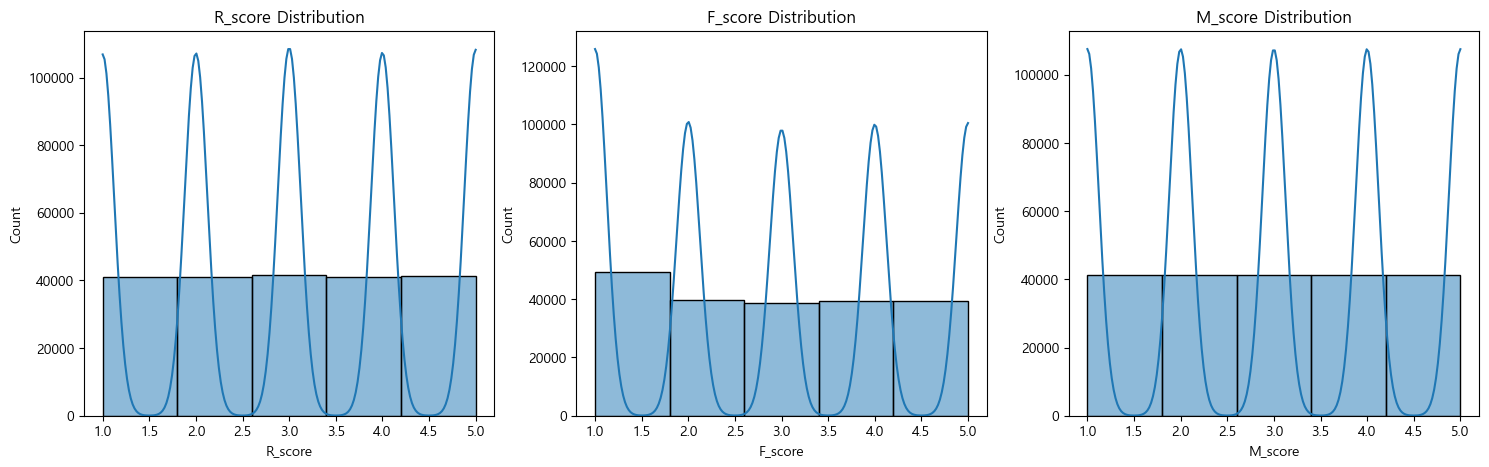

In [48]:
# RFM 점수 분포 확인
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['R_score'], bins=5, kde=True, ax=axes[0])
axes[0].set_title('R_score Distribution')

sns.histplot(rfm['F_score'], bins=5, kde=True, ax=axes[1])
axes[1].set_title('F_score Distribution')

sns.histplot(rfm['M_score'], bins=5, kde=True, ax=axes[2])
axes[2].set_title('M_score Distribution')

plt.show()

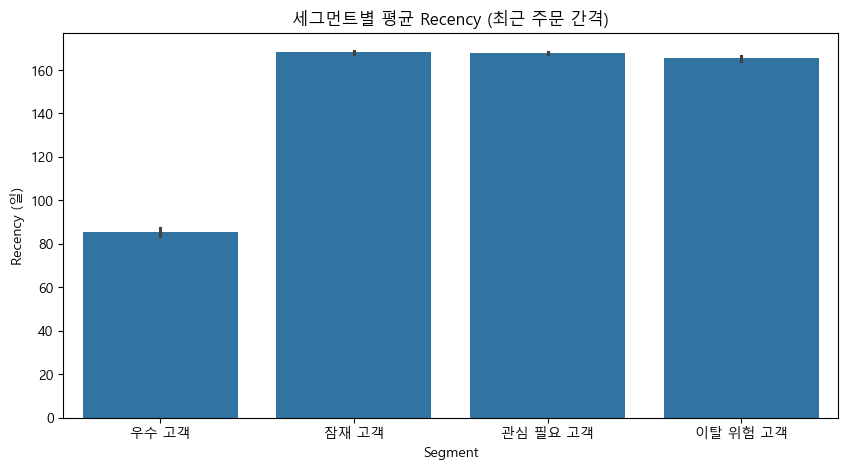

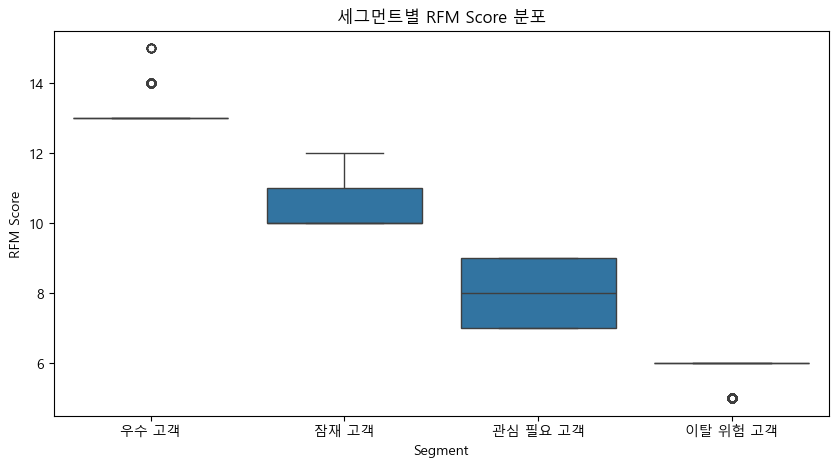

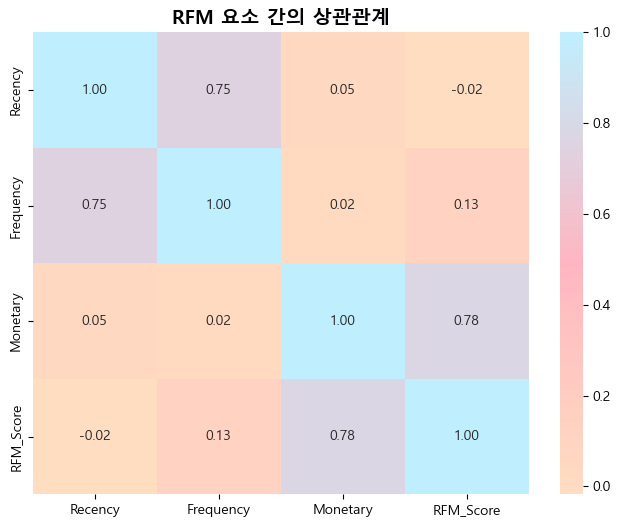

🟢 우수 고객 평균 Recency: 85.43일
🟢 우수 고객 평균 Frequency: 18.19회
🟢 우수 고객 평균 Monetary: 17.96개
🔴 이탈 위험 고객 평균 Recency: 165.36일
🔴 이탈 위험 고객 평균 Frequency: 8.74회
🔴 이탈 위험 고객 평균 Monetary: 3.32개


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 세그먼트별 평균 Recency 확인
plt.figure(figsize=(10,5))
sns.barplot(data=rfm, x='Segment', y='Recency', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 평균 Recency (최근 주문 간격)")
plt.ylabel("Recency (일)")
plt.show()

# ✅ 세그먼트별 평균 Frequency 확인
plt.figure(figsize=(10,5))
sns.barplot(data=rfm, x='Segment', y='Frequency', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 평균 Frequency (주문 빈도)")
plt.ylabel("Frequency (주문 횟수)")
plt.show()

# ✅ 세그먼트별 평균 Monetary 확인
plt.figure(figsize=(10,5))
sns.barplot(data=rfm, x='Segment', y='Monetary', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 평균 Monetary (평균 장바구니 크기)")
plt.ylabel("Monetary (구매 제품 수)")
plt.show()

# ✅ 세그먼트별 RFM Score 분포 확인
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm, x='Segment', y='RFM_Score', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 RFM Score 분포")
plt.ylabel("RFM Score")
plt.show()

# ✅ RFM Score 히스토그램 (전체 고객 분포)
plt.figure(figsize=(10,5))
sns.histplot(rfm['RFM_Score'], bins=20, kde=True)
plt.title("RFM Score 분포 (전체 고객)")
plt.xlabel("RFM Score")
plt.ylabel("고객 수")
plt.show()

# ✅ RFM 요소 간 상관관계 분석
rfm_corr = rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].corr()

# 파스텔 톤의 컬러맵 적용 (연한 블루-핑크 계열)
plt.figure(figsize=(8,6))
sns.heatmap(rfm_corr, annot=True, cmap=sns.blend_palette(["#FFDDC1", "#FFB6C1", "#BFEFFF"], as_cmap=True), fmt=".2f")

# 그래프 제목 설정
plt.title("RFM 요소 간의 상관관계", fontsize=14, fontweight='bold')

# 그래프 출력
plt.show()


# ✅ 고객 세그먼트 분포 확인
rfm_counts = rfm['Segment'].value_counts().reset_index()
rfm_counts.columns = ['Segment', 'Customer Count']

plt.figure(figsize=(8,6))
sns.barplot(data=rfm_counts, x='Segment', y='Customer Count', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("고객 세그먼트별 고객 수")
plt.ylabel("고객 수")
plt.show()

# ✅ VIP 고객 vs 이탈 위험 고객 비교 (평균값 확인)
vip_customers = rfm[rfm['Segment'] == '우수 고객']
churn_customers = rfm[rfm['Segment'] == '이탈 위험 고객']

print(f"🟢 우수 고객 평균 Recency: {vip_customers['Recency'].mean():.2f}일")
print(f"🟢 우수 고객 평균 Frequency: {vip_customers['Frequency'].mean():.2f}회")
print(f"🟢 우수 고객 평균 Monetary: {vip_customers['Monetary'].mean():.2f}개")

print(f"🔴 이탈 위험 고객 평균 Recency: {churn_customers['Recency'].mean():.2f}일")
print(f"🔴 이탈 위험 고객 평균 Frequency: {churn_customers['Frequency'].mean():.2f}회")
print(f"🔴 이탈 위험 고객 평균 Monetary: {churn_customers['Monetary'].mean():.2f}개")


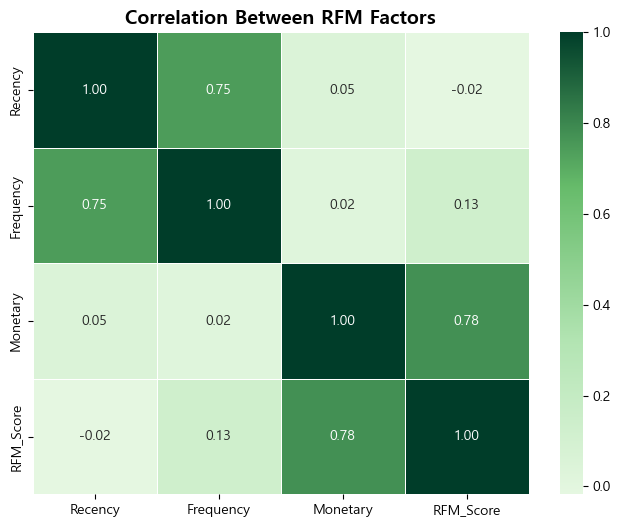

✅ 그래프가 저장되었습니다: 22-RFM_Correlation.png


In [50]:
# ✅ RFM 요소 간 상관관계 분석 (히트맵 색상 변경)
rfm_corr = rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(rfm_corr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title("Correlation Between RFM Factors", fontsize=14, fontweight='bold')

# ✅ 그래프 저장 (파일 경로 지정 가능)
save_path = "22-RFM_Correlation.png"  # 현재 폴더에 저장
# save_path = "C:/Users/YourName/Desktop/customer_segments_distribution.png"  # 특정 폴더에 저장
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# ✅ 그래프 출력 (저장 후에 실행)
plt.show()

print(f"✅ 그래프가 저장되었습니다: {save_path}")

plt.show()

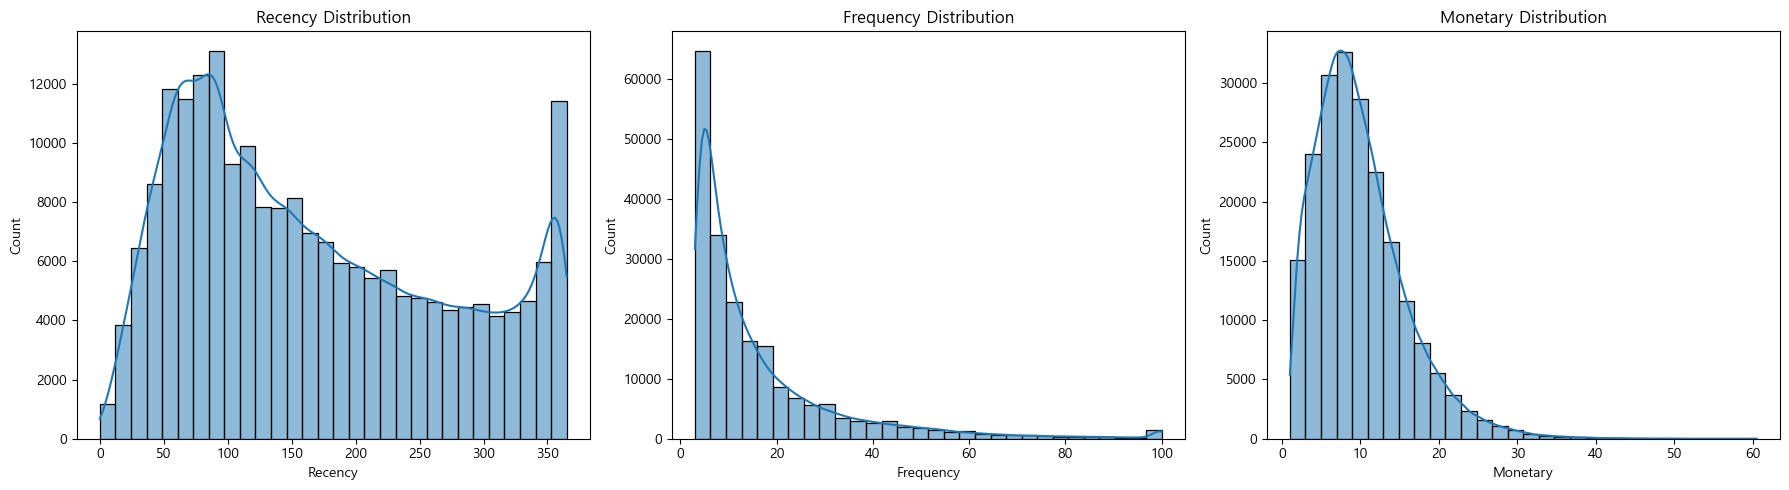

In [51]:
# 데이터 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# RFM 데이터에서 주요 변수 선택
rfm_features = ['Recency', 'Frequency', 'Monetary']

# 히스토그램 및 KDE 플롯
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(rfm_features):
    sns.histplot(rfm[feature], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# Box Plot (이상치 확인)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(rfm_features):
    sns.boxplot(y=rfm[feature], ax=axes[i])
    axes[i].set_title(f'{feature} Box Plot')
plt.tight_layout()
plt.show()

# Q-Q Plot (정규성 검정)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(rfm_features):
    stats.probplot(rfm[feature], dist="norm", plot=axes[i])
    axes[i].set_title(f'{feature} Q-Q Plot')
plt.tight_layout()
plt.show()


### 4-3. 결과의 신뢰도를 높이기 위한 시도
### 결론 : 기존에 이상치 제거, 로그변환, 값 조정 등의 변화를 주기 전 결과를 사용하는 것이 맞음.
#### 이상치 처리 및 로그 변환 전후의 변화 분석 -> 현재 이상치 제거 및 로그 변환을 적용한 값이 너무 낮아진 상태라면, 기존 데이터(이상치 제거 및 로그 변환 전)가 더 적절할 가능성이 큼. 주문 빈도(Frequency)와 평균 구매 수량(Monetary)이 너무 낮아짐
#### → 이상치 제거 및 로그 변환 과정에서 실제 주요 고객층(우수 고객, VIP 고객)이 손실되었을 가능성이 있음. 실제 구매 데이터에서 Frequency와 Monetary가 낮은 값으로 변환됨
#### → 원래는 일부 고객들이 10회 이상 주문하거나 50개 이상의 상품을 구매했을 가능성이 높은데, 로그 변환 후 이러한 차이가 작아져서 평균 값이 낮아짐

In [52]:
# 로그 변환 및 이상치 제거 후 RFM 분석 진행 방법

# 로그 변환 (log1p: log(1 + x) 적용하여 0 처리 가능)
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

In [53]:
# 이상치 탐지 함수 (IQR 기반)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 이상치 제거 적용 (로그 변환한 데이터 기준)
rfm_filtered = remove_outliers(rfm, 'Recency_log')
rfm_filtered = remove_outliers(rfm_filtered, 'Frequency_log')
rfm_filtered = remove_outliers(rfm_filtered, 'Monetary_log')

In [54]:
# RFM 점수화 (로그 변환된 데이터 사용)
rfm_filtered['R_score'] = pd.qcut(rfm_filtered['Recency_log'], 5, labels=False, duplicates='drop')
rfm_filtered['R_score'] = rfm_filtered['R_score'].max() - rfm_filtered['R_score'] + 1

rfm_filtered['F_score'] = pd.qcut(rfm_filtered['Frequency_log'], 5, labels=False, duplicates='drop') + 1
rfm_filtered['M_score'] = pd.qcut(rfm_filtered['Monetary_log'], 5, labels=False, duplicates='drop') + 1

# 총점 계산
rfm_filtered['RFM_Score'] = rfm_filtered[['R_score', 'F_score', 'M_score']].sum(axis=1)


In [56]:
# 고객 세그먼트 정의
def customer_segment(df):
    if df['RFM_Score'] >= 13:
        return '우수 고객'
    elif df['RFM_Score'] >= 10:
        return '잠재 고객'
    elif df['RFM_Score'] >= 7:
        return '관심 필요 고객'
    else:
        return '이탈 위험 고객'

rfm_filtered['Segment'] = rfm_filtered.apply(customer_segment, axis=1)

plt.figure(figsize=(14, 5))
sns.histplot(rfm_filtered['RFM_Score'], bins=10, kde=True)
plt.title("RFM Score Distribution After Log Transformation & Outlier Removal")
plt.show()

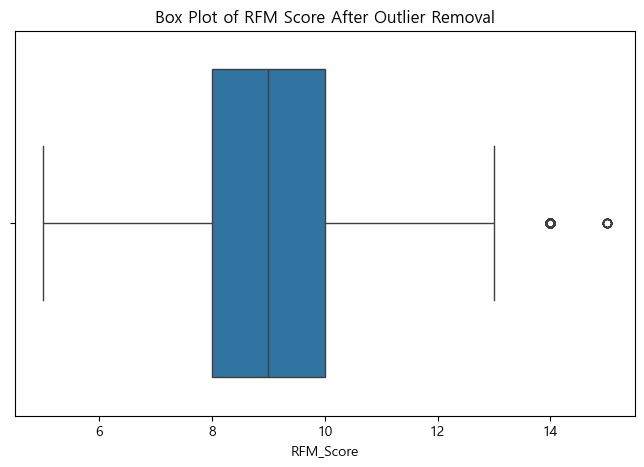

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=rfm_filtered["RFM_Score"])
plt.title("Box Plot of RFM Score After Outlier Removal")
plt.show()

In [58]:
print(rfm_filtered["RFM_Score"].describe())

count    202973.000000
mean          8.926256
std           1.632652
min           5.000000
25%           8.000000
50%           9.000000
75%          10.000000
max          15.000000
Name: RFM_Score, dtype: float64


In [59]:
Q1 = rfm_filtered["RFM_Score"].quantile(0.25)
Q3 = rfm_filtered["RFM_Score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rfm_filtered[(rfm_filtered["RFM_Score"] < lower_bound) | (rfm_filtered["RFM_Score"] > upper_bound)]
print(f"남아 있는 이상치 개수: {len(outliers)}")


남아 있는 이상치 개수: 130


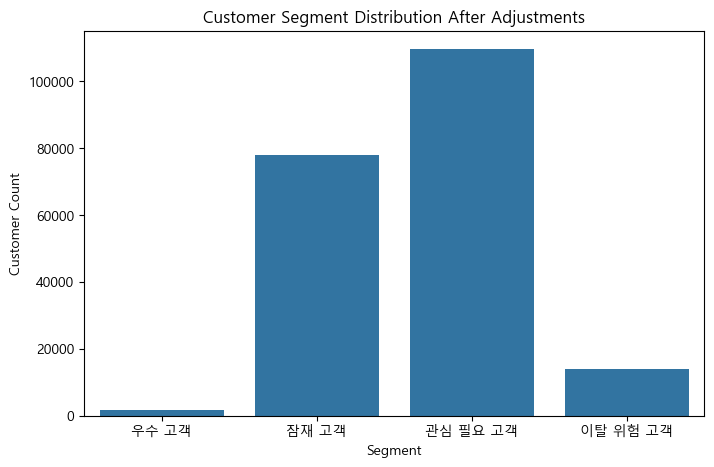

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm_filtered, x='Segment', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("Customer Segment Distribution After Adjustments")
plt.ylabel("Customer Count")
plt.show()

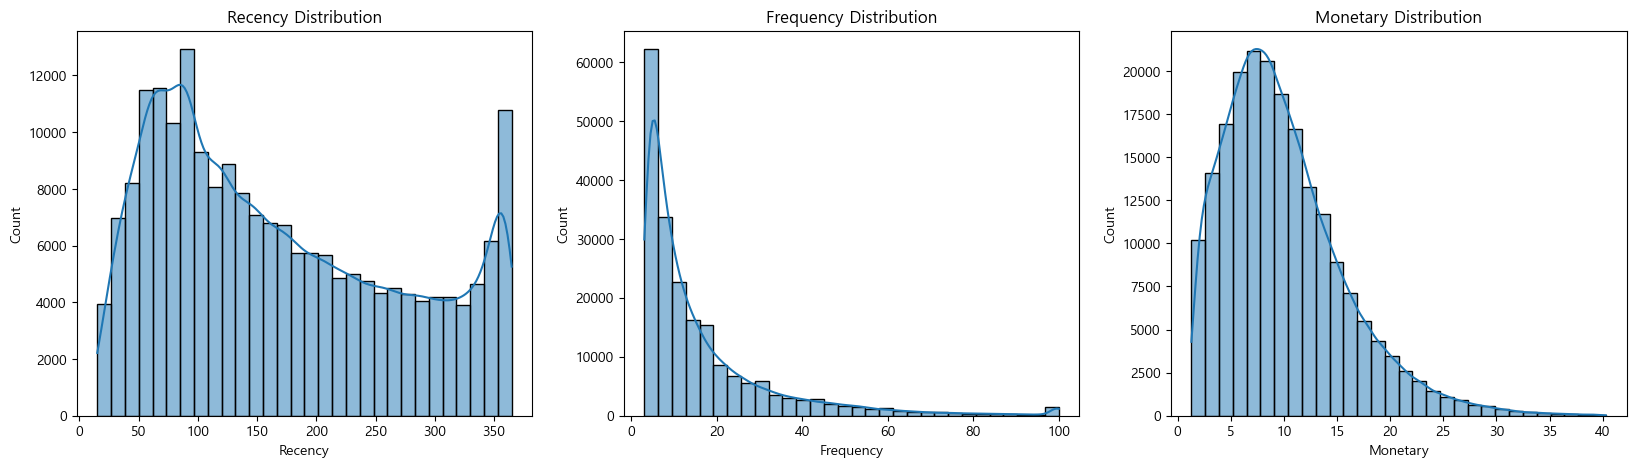

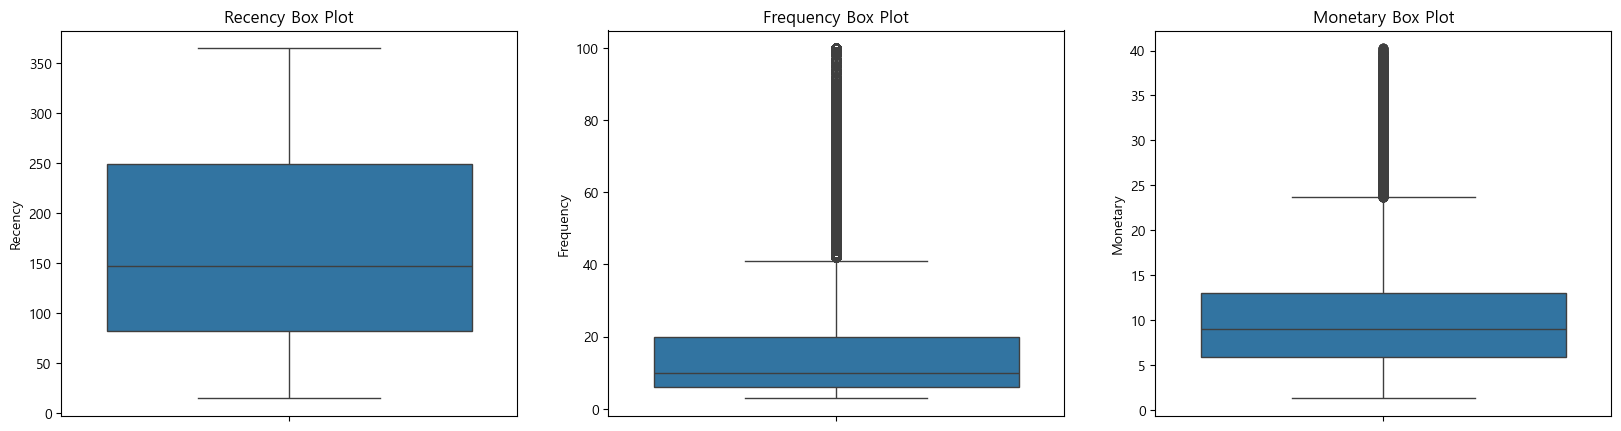

In [61]:
# 데이터 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

# RFM 개별 요소의 히스토그램 및 KDE 플롯
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(rfm_filtered["Recency"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Recency Distribution")

sns.histplot(rfm_filtered["Frequency"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm_filtered["Monetary"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Monetary Distribution")

plt.show()
# box plot으로 이상치 검출
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(y=rfm_filtered["Recency"], ax=axes[0])
axes[0].set_title("Recency Box Plot")

sns.boxplot(y=rfm_filtered["Frequency"], ax=axes[1])
axes[1].set_title("Frequency Box Plot")

sns.boxplot(y=rfm_filtered["Monetary"], ax=axes[2])
axes[2].set_title("Monetary Box Plot")

plt.show()
# Q-Q plot(정규성 검정)
import scipy.stats as stats
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

stats.probplot(rfm_filtered["Recency"], dist="norm", plot=axes[0])
axes[0].set_title("Recency Q-Q Plot")

stats.probplot(rfm_filtered["Frequency"], dist="norm", plot=axes[1])
axes[1].set_title("Frequency Q-Q Plot")

stats.probplot(rfm_filtered["Monetary"], dist="norm", plot=axes[2])
axes[2].set_title("Monetary Q-Q Plot")

plt.show()


In [62]:
# 데이터 기본 통계량 확인
print("Recency Summary:")
print(rfm_filtered["Recency"].describe())

print("\nFrequency Summary:")
print(rfm_filtered["Frequency"].describe())

print("\nMonetary Summary:")
print(rfm_filtered["Monetary"].describe())

Recency Summary:
count    202973.000000
mean        168.720781
std         101.580749
min          15.000000
25%          82.000000
50%         147.000000
75%         249.000000
max         365.000000
Name: Recency, dtype: float64

Frequency Summary:
count    202973.000000
mean         16.384292
std          16.722553
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: Frequency, dtype: float64

Monetary Summary:
count    202973.000000
mean         10.026821
std           5.732897
min           1.303571
25%           5.857143
50%           9.000000
75%          13.000000
max          40.285714
Name: Monetary, dtype: float64


In [63]:
# 이상치 처리, 로그 변환, 정규성 확보, 그리고 RFM 분석을 다시 수행하는 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1 Recency, Frequency, Monetary 계산
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

# Recency: 고객별 최근 주문 시점 (일수 기준)
user_recency = df.groupby(['user_id', 'order_number'])['days_since_prior_order'].first().groupby(level=0).cumsum().reset_index()
recency_df = user_recency.groupby('user_id')['days_since_prior_order'].max().reset_index()
recency_df.rename(columns={'days_since_prior_order': 'Recency'}, inplace=True)

# Frequency: 고객별 총 주문 횟수
frequency_df = df.groupby('user_id')['order_id'].nunique().reset_index()
frequency_df.rename(columns={'order_id': 'Frequency'}, inplace=True)

# Monetary: 고객별 평균 장바구니 크기
monetary_df = df.groupby(['user_id', 'order_id']).size().groupby('user_id').mean().reset_index()
monetary_df.rename(columns={0: 'Monetary'}, inplace=True)

# 2 데이터 병합 (RFM 데이터 생성)
rfm = recency_df.merge(frequency_df, on='user_id').merge(monetary_df, on='user_id')

# 3 이상치 제거 (IQR 방식)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

rfm = remove_outliers(rfm, 'Frequency')
rfm = remove_outliers(rfm, 'Monetary')

# 4 로그 변환 (정규화)
rfm['Frequency'] = np.log1p(rfm['Frequency'])
rfm['Monetary'] = np.log1p(rfm['Monetary'])

# 5 데이터 분포 시각화 (히스토그램, 박스 플롯, Q-Q Plot)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    # 히스토그램 & KDE
    sns.histplot(rfm[col], bins=50, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Distribution')
    
    # 박스 플롯
    sns.boxplot(x=rfm[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Box Plot')

    # Q-Q Plot
    stats.probplot(rfm[col], dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title(f'{col} Q-Q Plot')

plt.tight_layout()
plt.show()

# 6 RFM 점수화 (pd.qcut & pd.cut 비교 가능)
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop')
rfm['R_score'] = rfm['R_score'].max() - rfm['R_score'] + 1

rfm['F_score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1

# 7 RFM Score 계산
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

# 8 고객 세그먼트 정의
def customer_segment(df):
    if df['RFM_Score'] >= 13:
        return '우수 고객'
    elif df['RFM_Score'] >= 10:
        return '잠재 고객'
    elif df['RFM_Score'] >= 7:
        return '관심 필요 고객'
    else:
        return '이탈 위험 고객'

rfm['Segment'] = rfm.apply(customer_segment, axis=1)

# 9 고객 세그먼트 분포 시각화
plt.figure(figsize=(8,5))
sns.countplot(x=rfm['Segment'], order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title('고객 세그먼트별 고객 수')
plt.xlabel('Segment')
plt.ylabel('고객 수')
plt.show()

# 10 세그먼트별 평균 Recency, Frequency, Monetary 확인
segment_means = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
print(segment_means)


             Recency  Frequency  Monetary
Segment                                  
관심 필요 고객  153.718286   2.341949  2.006258
우수 고객      80.847202   2.729774  2.822016
이탈 위험 고객  154.305258   2.091725  1.407947
잠재 고객     152.795968   2.488350  2.663579


In [64]:
# 데이터 기본 통계량 확인
print("🔹 데이터 기본 통계량")
print(rfm.describe())

# 고객 세그먼트별 통계량 확인
print("\n🔹 고객 세그먼트별 기본 통계량")
print(rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].describe())

# 세그먼트별 고객 수 확인
print("\n🔹 세그먼트별 고객 수")
print(rfm['Segment'].value_counts())

# 세그먼트별 평균 RFM 값 확인
print("\n🔹 세그먼트별 평균 RFM 값")
segment_means = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
print(segment_means)

# 상관관계 분석
print("\n🔹 RFM 요소 간 상관관계")
print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].corr())

🔹 데이터 기본 통계량
             user_id        Recency      Frequency       Monetary  \
count  184366.000000  184366.000000  184366.000000  184366.000000   
mean   103201.059555     152.600886       2.382867       2.219258   
std     59546.047730      92.424867       0.626009       0.527666   
min         1.000000       0.000000       1.386294       0.693147   
25%     51656.250000      77.000000       1.791759       1.890850   
50%    103285.500000     132.000000       2.302585       2.277267   
75%    154830.750000     219.000000       2.833213       2.608614   
max    206209.000000     365.000000       3.737670       3.216015   

             R_score        F_score        M_score      RFM_Score  
count  184366.000000  184366.000000  184366.000000  184366.000000  
mean        3.008385       2.914670       2.996881       8.919936  
std         1.415841       1.466326       1.413832       1.675292  
min         1.000000       1.000000       1.000000       5.000000  
25%         2.000000     

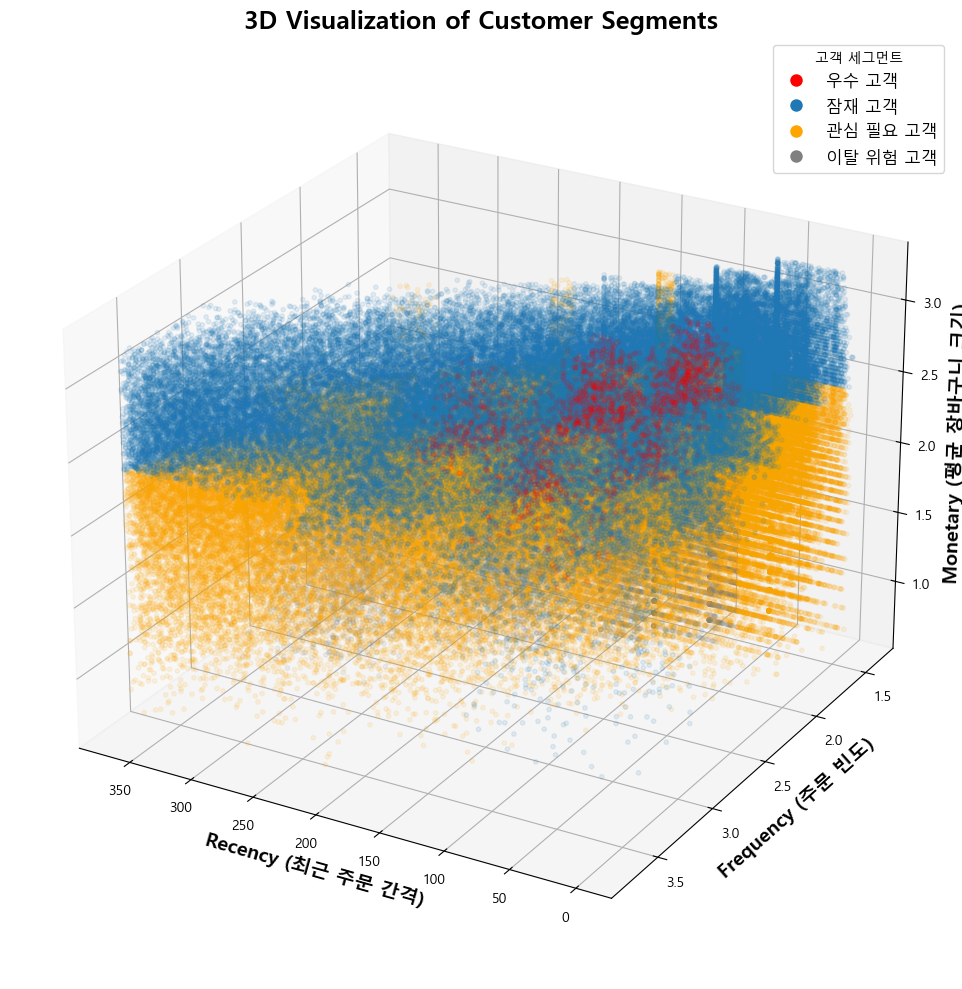

In [65]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 고객 세그먼트 색상 정의
colors = {
    '우수 고객':'#FF0000',
    '잠재 고객':'#1f77b4',
    '관심 필요 고객':'#FFA500',
    '이탈 위험 고객':'#808080'
}

# 고객 그룹별 산점도 (투명도 높게 설정)
for segment, color in colors.items():
    subset = rfm[rfm['Segment'] == segment]
    ax.scatter(
        subset['Recency'], subset['Frequency'], subset['Monetary'],
        c=color, s=10, alpha=0.1
    )

# 축 라벨 및 제목 강조
ax.set_xlabel('Recency (최근 주문 간격)', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency (주문 빈도)', fontsize=14, fontweight='bold')
ax.set_zlabel('Monetary (평균 장바구니 크기)', fontsize=14, fontweight='bold')
ax.set_title('3D Visualization of Customer Segments', fontsize=18, fontweight='bold')

# 명확한 범례 생성
legend_elements = [Line2D([0], [0], marker='o', color='w', label=segment,
                          markerfacecolor=color, markersize=10, alpha=1)
                   for segment, color in colors.items()]
ax.legend(handles=legend_elements, fontsize=12, title='고객 세그먼트')

# 시점 조정
ax.view_init(elev=25, azim=120)

plt.tight_layout()
plt.show()

In [66]:
# pd.cut활용
# RFM 점수화 (균등한 간격 binning 적용)
rfm['R_score'] = pd.cut(rfm['Recency'], bins=5, labels=[5, 4, 3, 2, 1])  # Recency는 낮을수록 좋은 점수
rfm['F_score'] = pd.cut(rfm['Frequency'], bins=5, labels=[1, 2, 3, 4, 5])  # Frequency는 높을수록 좋은 점수
rfm['M_score'] = pd.cut(rfm['Monetary'], bins=5, labels=[1, 2, 3, 4, 5])  # Monetary도 높을수록 좋은 점수

# 점수 변환 (object -> int)
rfm['R_score'] = rfm['R_score'].astype(int)
rfm['F_score'] = rfm['F_score'].astype(int)
rfm['M_score'] = rfm['M_score'].astype(int)

# RFM 총점 계산
rfm['RFM_Score'] = rfm[['R_score', 'F_score', 'M_score']].sum(axis=1)

# 확인
rfm.head()

user_id  Recency  Frequency  Monetary  R_score  F_score  M_score  \
0        1    190.0   2.484907  1.996554        3        3        3   
1        2    228.0   2.772589  2.776747        2        3        5   
2        3    133.0   2.564949  2.120264        4        3        3   
3        4     55.0   1.791759  1.526056        5        1        2   
4        5     46.0   1.791759  2.322388        5        1        4   

   RFM_Score   Segment  
0          9  관심 필요 고객  
1         10     잠재 고객  
2         10  관심 필요 고객  
3          8  관심 필요 고객  
4         10  관심 필요 고객

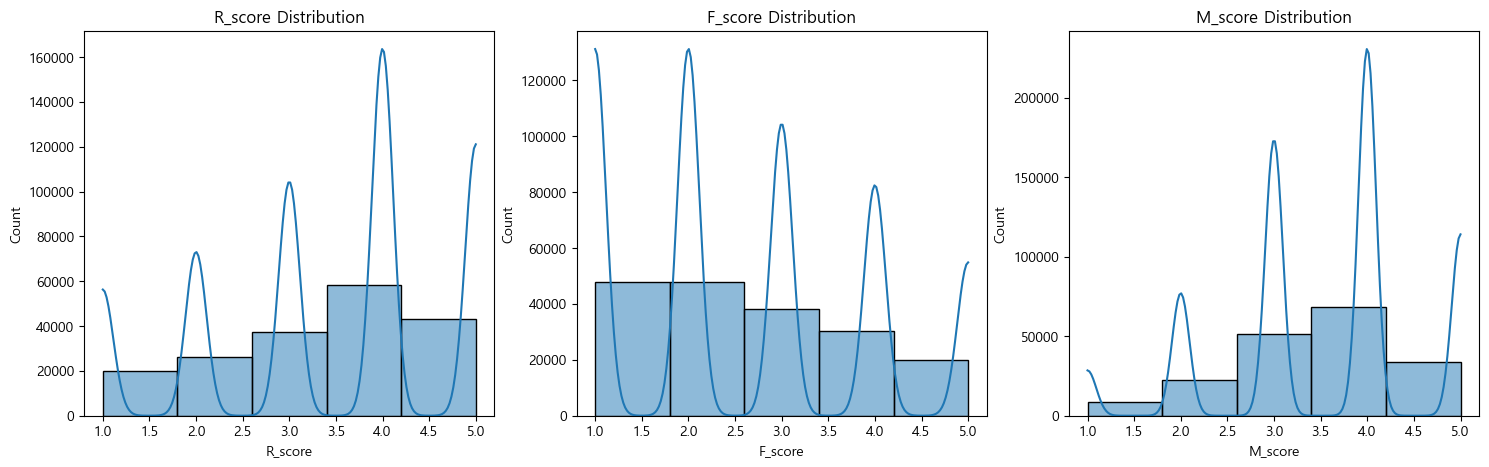

In [67]:
# RFM 점수 분포 확인
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['R_score'], bins=5, kde=True, ax=axes[0])
axes[0].set_title('R_score Distribution')

sns.histplot(rfm['F_score'], bins=5, kde=True, ax=axes[1])
axes[1].set_title('F_score Distribution')

sns.histplot(rfm['M_score'], bins=5, kde=True, ax=axes[2])
axes[2].set_title('M_score Distribution')

plt.show()

C:\Users\lsy\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


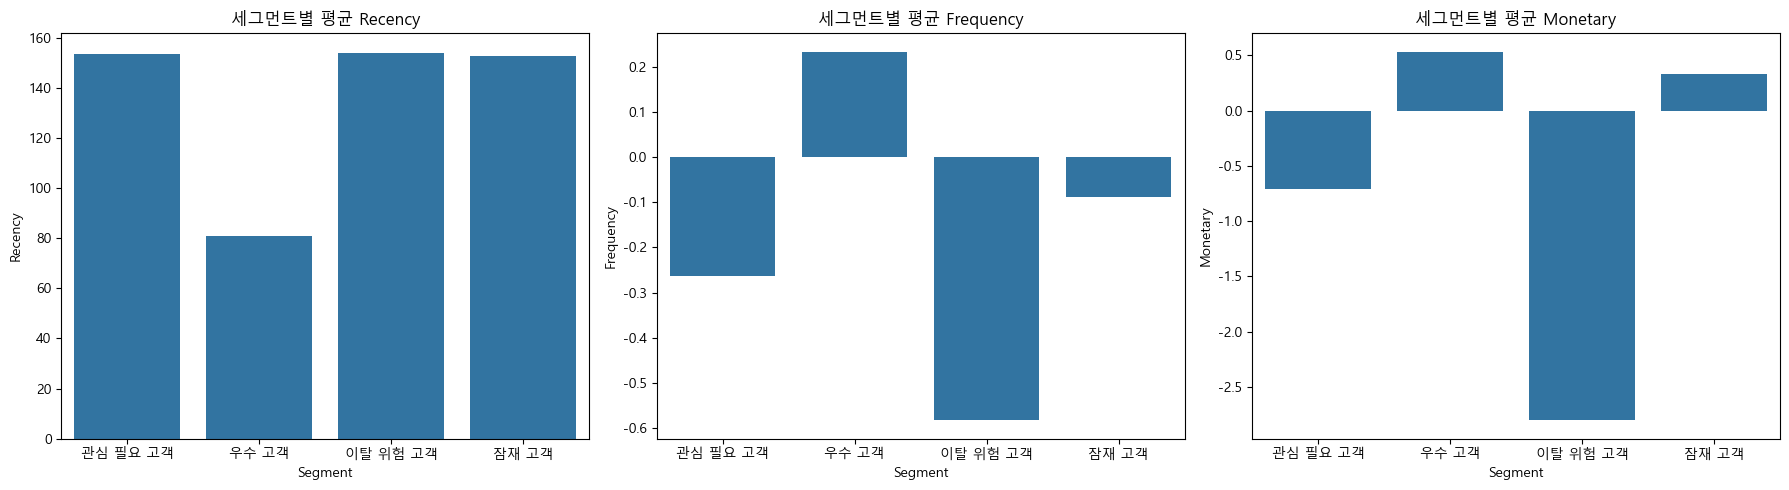

             Recency  Frequency  Monetary
Segment                                  
관심 필요 고객  153.718286  -0.263530 -0.707200
우수 고객      80.847202   0.233026  0.531906
이탈 위험 고객  154.305258  -0.582053 -2.802026
잠재 고객     152.795968  -0.088466  0.334453


In [69]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# 1 Winsorizing 적용 (극단값 조정)
def winsorize_series(series, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return np.clip(series, lower_bound, upper_bound)

rfm['Frequency'] = winsorize_series(rfm['Frequency'])
rfm['Monetary'] = winsorize_series(rfm['Monetary'])

# 2 로그 변환 적용 (정규화)
rfm['Frequency'] = np.log1p(rfm['Frequency'])
rfm['Monetary'] = np.log1p(rfm['Monetary'])

# 3 Robust Scaling 적용 (중앙값 중심으로 스케일 조정)
scaler = RobustScaler()
rfm[['Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Frequency', 'Monetary']])

# 4 세그먼트별 평균 재확인
segment_means = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()

# 5 시각화 (세그먼트별 평균값 비교)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.barplot(x=segment_means.index, y=segment_means[metric], ax=axes[i])
    axes[i].set_title(f'세그먼트별 평균 {metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Segment')

plt.tight_layout()
plt.show()

# 6 새로운 평균값 출력
print(segment_means)


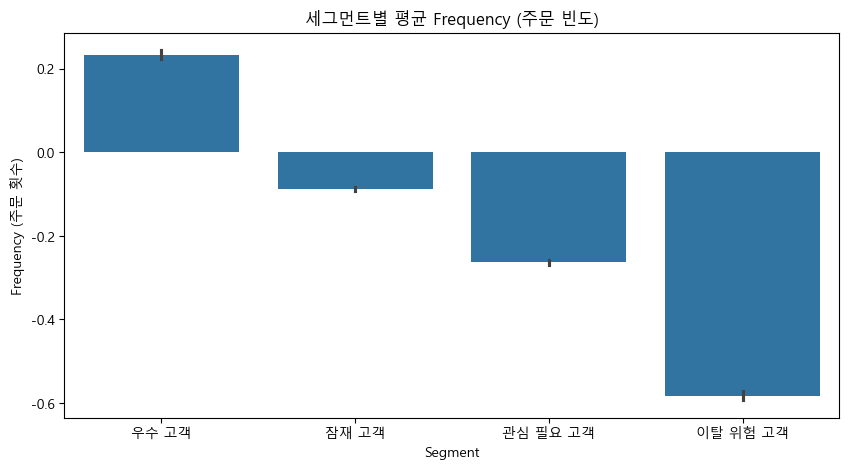

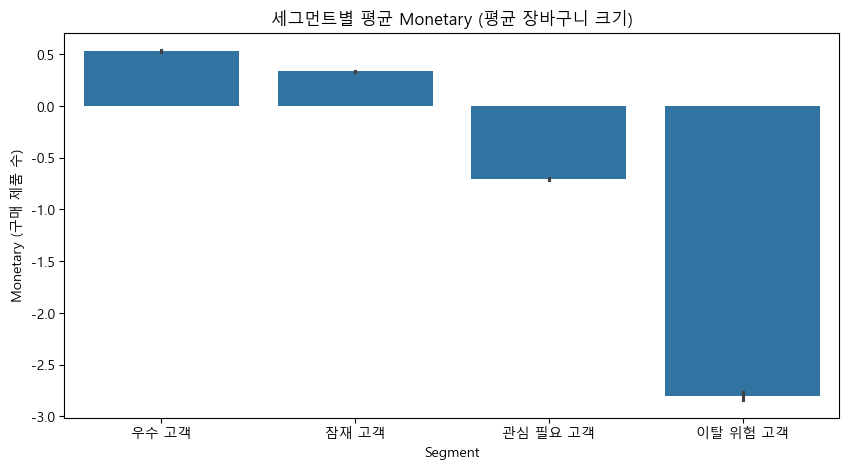

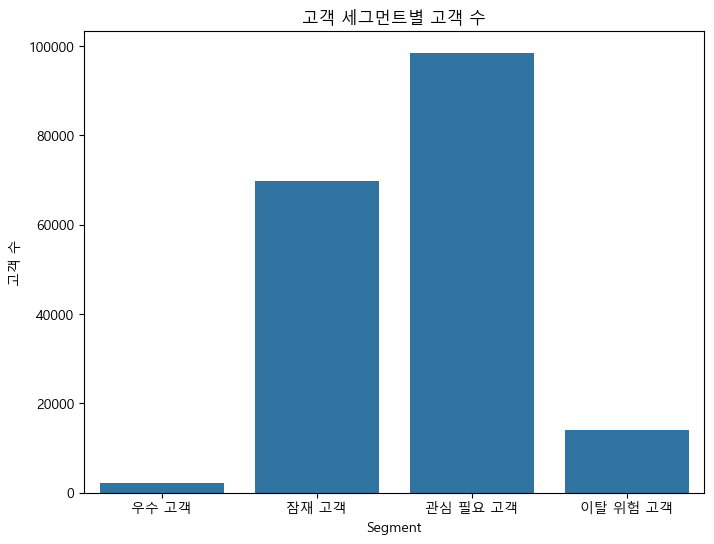

🟢 우수 고객 평균 Recency: 80.85일
🟢 우수 고객 평균 Frequency: 0.23회
🟢 우수 고객 평균 Monetary: 0.53개
🔴 이탈 위험 고객 평균 Recency: 154.31일
🔴 이탈 위험 고객 평균 Frequency: -0.58회
🔴 이탈 위험 고객 평균 Monetary: -2.80개


In [70]:

# ✅ 세그먼트별 평균 Recency 확인
plt.figure(figsize=(10,5))
sns.barplot(data=rfm, x='Segment', y='Recency', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 평균 Recency (최근 주문 간격)")
plt.ylabel("Recency (일)")
plt.show()

# ✅ 세그먼트별 평균 Frequency 확인
plt.figure(figsize=(10,5))
sns.barplot(data=rfm, x='Segment', y='Frequency', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 평균 Frequency (주문 빈도)")
plt.ylabel("Frequency (주문 횟수)")
plt.show()

# ✅ 세그먼트별 평균 Monetary 확인
plt.figure(figsize=(10,5))
sns.barplot(data=rfm, x='Segment', y='Monetary', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 평균 Monetary (평균 장바구니 크기)")
plt.ylabel("Monetary (구매 제품 수)")
plt.show()

# ✅ 세그먼트별 RFM Score 분포 확인
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm, x='Segment', y='RFM_Score', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("세그먼트별 RFM Score 분포")
plt.ylabel("RFM Score")
plt.show()

# ✅ RFM Score 히스토그램 (전체 고객 분포)
plt.figure(figsize=(10,5))
sns.histplot(rfm['RFM_Score'], bins=20, kde=True)
plt.title("RFM Score 분포 (전체 고객)")
plt.xlabel("RFM Score")
plt.ylabel("고객 수")
plt.show()

# ✅ RFM 요소 간 상관관계 분석
rfm_corr = rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("RFM 요소 간의 상관관계")
plt.show()

# ✅ 고객 세그먼트 분포 확인
rfm_counts = rfm['Segment'].value_counts().reset_index()
rfm_counts.columns = ['Segment', 'Customer Count']

plt.figure(figsize=(8,6))
sns.barplot(data=rfm_counts, x='Segment', y='Customer Count', order=['우수 고객', '잠재 고객', '관심 필요 고객', '이탈 위험 고객'])
plt.title("고객 세그먼트별 고객 수")
plt.ylabel("고객 수")
plt.show()

# ✅ VIP 고객 vs 이탈 위험 고객 비교 (평균값 확인)
vip_customers = rfm[rfm['Segment'] == '우수 고객']
churn_customers = rfm[rfm['Segment'] == '이탈 위험 고객']

print(f"🟢 우수 고객 평균 Recency: {vip_customers['Recency'].mean():.2f}일")
print(f"🟢 우수 고객 평균 Frequency: {vip_customers['Frequency'].mean():.2f}회")
print(f"🟢 우수 고객 평균 Monetary: {vip_customers['Monetary'].mean():.2f}개")

print(f"🔴 이탈 위험 고객 평균 Recency: {churn_customers['Recency'].mean():.2f}일")
print(f"🔴 이탈 위험 고객 평균 Frequency: {churn_customers['Frequency'].mean():.2f}회")
print(f"🔴 이탈 위험 고객 평균 Monetary: {churn_customers['Monetary'].mean():.2f}개")